#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Data Dictionary

<img src='data_dict.PNG'/>

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import sklearn.linear_model as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import warnings
import statsmodels
import functools

warnings.filterwarnings('ignore')

In [2]:
default_palette=sns.color_palette("pastel")
default_palette

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

#### Data Understanding

In [3]:
data=pd.read_csv("C:\\Users\\meenaxi\\Desktop\\case_study_II_day.csv")

In [4]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
data.shape

(730, 16)

In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
data.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

#### Total Number of Bikes Rented

In [9]:
np.sum(data['cnt'])

np.int64(3290845)

#### Total Number of Casual Users Renting Bikes

In [10]:
np.sum(data['casual'])

np.int64(619952)

#### Total Number of Registered Users Renting Bikes

In [11]:
np.sum(data['registered'])

np.int64(2670893)

#### Histplot of Rented Bikes

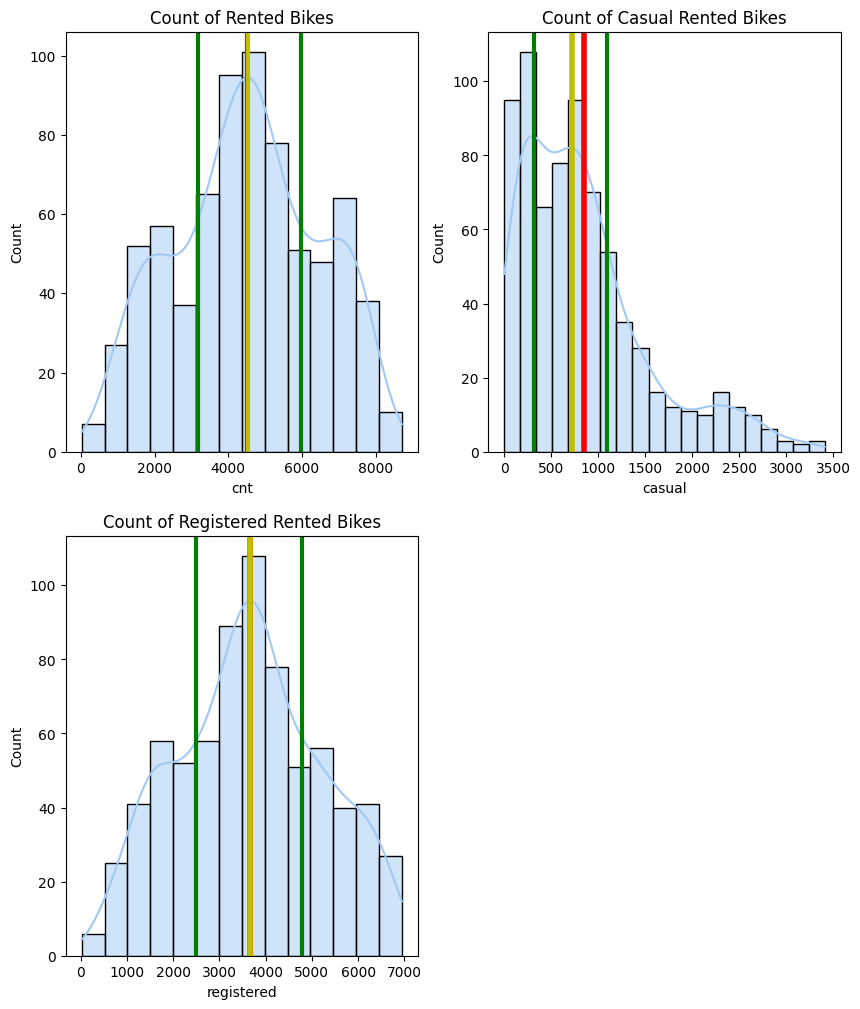

In [12]:
pyplot.figure(figsize=(10,12))
pyplot.subplot(2,2,1)
ax=sns.histplot(data['cnt'],kde=True,color=default_palette[0])
ax.axvline(x=data['cnt'].mean(),color='r',linewidth=3)
ax.axvline(x=data['cnt'].median(),color='y',linewidth=3)
ax.axvline(x=np.quantile(data['cnt'],0.25),color='g',linewidth=3)
ax.axvline(x=np.quantile(data['cnt'],0.75),color='g',linewidth=3)
ax.set_title("Count of Rented Bikes")
pyplot.subplot(2,2,2)
ax1=sns.histplot(data['casual'],kde=True,color=default_palette[0])
ax1.set_title("Count of Casual Rented Bikes")
ax1.axvline(x=data['casual'].mean(),color='r',linewidth=4)
ax1.axvline(x=data['casual'].median(),color='y',linewidth=4)
ax1.axvline(x=np.quantile(data['casual'],0.25),color='g',linewidth=3)
ax1.axvline(x=np.quantile(data['casual'],0.75),color='g',linewidth=3)
pyplot.subplot(2,2,3)
ax2=sns.histplot(data['registered'],kde=True,color=default_palette[0])
ax2.axvline(x=data['registered'].mean(),color='r',linewidth=4)
ax2.axvline(x=data['registered'].median(),color='y',linewidth=4)
ax2.axvline(x=np.quantile(data['registered'],0.25),color='g',linewidth=3)
ax2.axvline(x=np.quantile(data['registered'],0.75),color='g',linewidth=3)
ax2.set_title("Count of Registered Rented Bikes")
pyplot.show()

In [13]:
data[['casual','registered','cnt']].describe()

,casual,registered,cnt
count,730.000000,730.000000,730.000000
mean,849.249315,3658.757534,4508.006849
std,686.479875,1559.758728,1936.011647
min,2.000000,20.000000,22.000000
25%,316.250000,2502.250000,3169.750000
50%,717.000000,3664.500000,4548.500000
75%,1096.500000,4783.250000,5966.000000
max,3410.000000,6946.000000,8714.000000


##### Inference

<font color='brown'>
   1. 75th percentile of Rented bikes are around 6k for a given day <br/>
   2. 75th percentile of Casual bikes are as high as 4.8k for a given day <br/>
   3. The histogram peaks below 500 for casual, around 3500 for registered and above 4500 totally<br/>
   4. The cnt is nothing but casual+registered , The columns are dropped post feature engineering post EDA 
</font>

#### Histplot of Temperature , Humidity , Windspeed

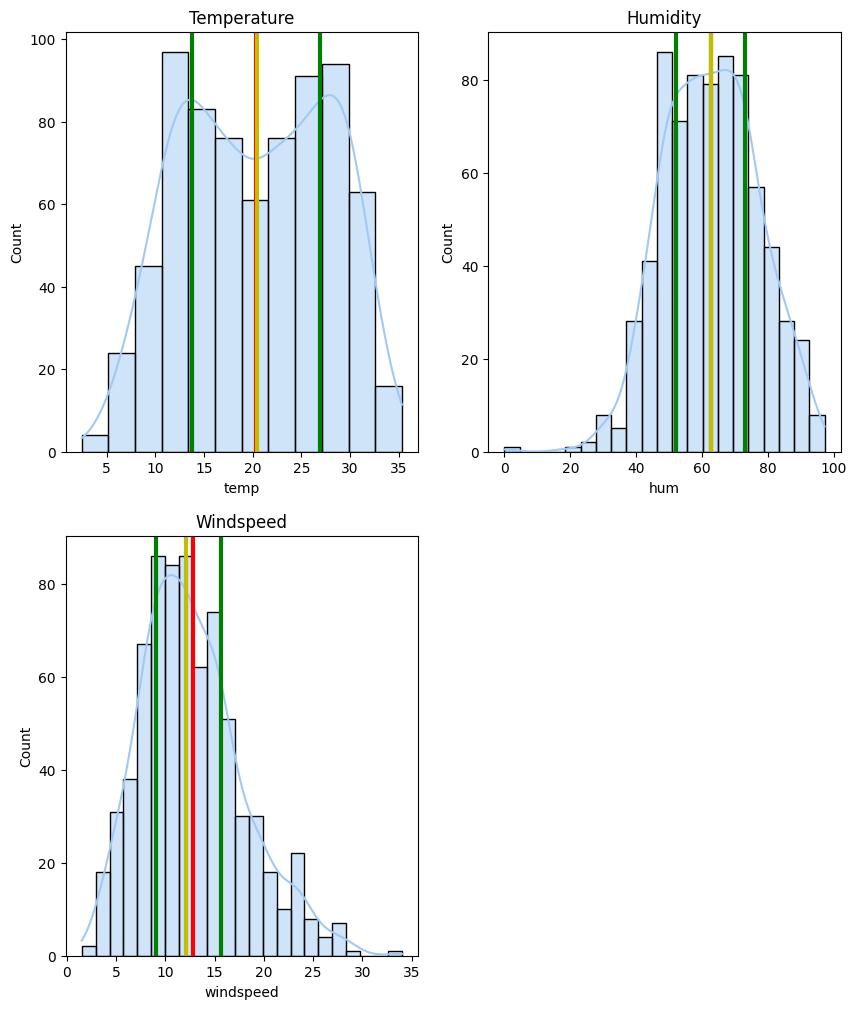

In [14]:
pyplot.figure(figsize=(10,12))
pyplot.subplot(2,2,1)
ax1=sns.histplot(data['temp'],kde=True,color=default_palette[0])
ax1.axvline(x=data['temp'].mean(),color='r',linewidth=3)
ax1.axvline(x=data['temp'].median(),color='y',linewidth=3)
ax1.axvline(x=np.quantile(data['temp'],0.25),color='g',linewidth=3)
ax1.axvline(x=np.quantile(data['temp'],0.75),color='g',linewidth=3)
ax1.set_title("Temperature")
pyplot.subplot(2,2,2)
ax2=sns.histplot(data['hum'],kde=True,color=default_palette[0])
ax2.axvline(x=data['hum'].mean(),color='r',linewidth=3)
ax2.axvline(x=data['hum'].median(),color='y',linewidth=3)
ax2.axvline(x=np.quantile(data['hum'],0.25),color='g',linewidth=3)
ax2.axvline(x=np.quantile(data['hum'],0.75),color='g',linewidth=3)
ax2.set_title("Humidity")
pyplot.subplot(2,2,3)
ax3=sns.histplot(data['windspeed'],kde=True,color=default_palette[0])
ax3.axvline(x=data['windspeed'].mean(),color='r',linewidth=3)
ax3.axvline(x=data['windspeed'].median(),color='y',linewidth=3)
ax3.axvline(x=np.quantile(data['windspeed'],0.25),color='g',linewidth=3)
ax3.axvline(x=np.quantile(data['windspeed'],0.75),color='g',linewidth=3)
ax3.set_title("Windspeed")
pyplot.show()

In [15]:
data[['temp','hum','windspeed']].describe()

,temp,hum,windspeed
count,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620
std,7.506729,14.237589,5.195841
min,2.424346,0.000000,1.500244
25%,13.811885,52.000000,9.041650
50%,20.465826,62.625000,12.125325
75%,26.880615,72.989575,15.625589
max,35.328347,97.250000,34.000021


##### Inference

<font color='brown'>
   1. The median temperature lies at around 20 celcius and max soars at 35 celcius<br/>
   2. 75th percentile of humidity lies around 72<br/>
   3. 75th percentile of windspeed lies around 15<br/>
   4. The histogram peaks are around 10-15 C and 25-30 C for temperature <br/>
   5. The histogram peaks are around 60 for humidity and 10-15 for windspeed<br/>
</font>

#### Derived Variables From the Date Column

##### Converting dteday to datetime Index

In [16]:
data['dteday']=pd.DatetimeIndex(data['dteday'])

In [17]:
data=data.sort_values(by='dteday')

In [18]:
data.dteday.min()

Timestamp('2018-01-01 00:00:00')

#### Calculating cumulative date difference from the start of yr 2018 till 2019

In [19]:
data['diff_in_days']=data['dteday']-data.dteday.min()

In [20]:
data.iloc[0]

instant                           1
dteday          2018-01-01 00:00:00
season                            1
yr                                0
mnth                              1
holiday                           0
weekday                           6
workingday                        0
weathersit                        2
temp                      14.110847
atemp                      18.18125
hum                         80.5833
windspeed                 10.749882
casual                          331
registered                      654
cnt                             985
diff_in_days        0 days 00:00:00
Name: 0, dtype: object

In [21]:
pd.DatetimeIndex(data['dteday']).inferred_freq

'D'

In [22]:
diff_days=[(data.iloc[i+1]['dteday']-data.iloc[i]['dteday']).days for i in range(0,len(data)-1)]
np.max(diff_days)

np.int64(1)

In [23]:
data['diff_in_days']=data['diff_in_days'].apply(lambda x:int(str(x).split(" ")[0]))

#### Other derived variables for EDA

In [24]:
data['year']=pd.DatetimeIndex(data['dteday']).year
data['month_name']=pd.DatetimeIndex(data['dteday']).month_name()
data['day_name']=pd.DatetimeIndex(data['dteday']).day_name()
data['month_start']=pd.DatetimeIndex(data['dteday']).is_month_start
data['month_end']=pd.DatetimeIndex(data['dteday']).is_month_end
data['year_end']=pd.DatetimeIndex(data['dteday']).is_year_end
data['year_start']=pd.DatetimeIndex(data['dteday']).is_year_start



In [25]:
data['7D sum']=data[['dteday','cnt']].rolling('7D',on='dteday').sum()['cnt']

In [26]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,diff_in_days,year,month_name,day_name,month_start,month_end,year_end,year_start,7D sum
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,...,985,0,2018,January,Monday,True,False,False,True,985.0
31,32,2018-01-02,1,0,2,0,2,1,2,7.879134,...,1360,1,2018,January,Tuesday,False,False,False,False,2345.0
59,60,2018-01-03,1,0,3,0,2,1,1,10.933347,...,1851,2,2018,January,Wednesday,False,False,False,False,4196.0
90,91,2018-01-04,2,0,4,0,5,1,2,12.300000,...,2227,3,2018,January,Thursday,False,False,False,False,6423.0
120,121,2018-01-05,2,0,5,0,0,0,2,18.518347,...,3351,4,2018,January,Friday,False,False,False,False,9774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,1,12,0,4,1,2,10.420847,...,2114,725,2019,December,Friday,False,False,False,False,11647.0
726,727,2019-12-28,1,1,12,0,5,1,2,10.386653,...,3095,726,2019,December,Saturday,False,False,False,False,11119.0
727,728,2019-12-29,1,1,12,0,6,0,2,10.386653,...,1341,727,2019,December,Sunday,False,False,False,False,10711.0
728,729,2019-12-30,1,1,12,0,0,0,1,10.489153,...,1796,728,2019,December,Monday,False,False,False,False,10720.0


#### EDA

#### Yearwise Count of rental bikes

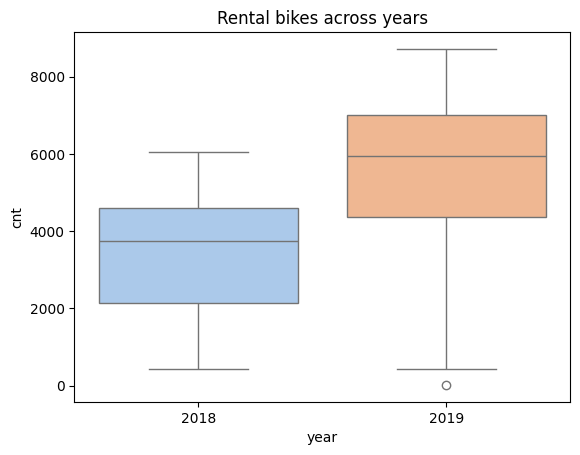

In [27]:

ax=sns.boxplot(data,x='year',y='cnt',palette=default_palette)
ax.set_title('Rental bikes across years')
pyplot.show()

#### Inference
<font color='brown'>
1. No of Rental bikes are high in the year 2019 . <br/>
2. The median for 2019 lies around 6k whereas for 2018 it lies around 4000 <br/>
3. The spread is somewhere between 2k to just above 4k in 2018 , where as 2019 shows a spread from 4k to > 6k <br/>
</font>

#### Season wise count of rental bikes

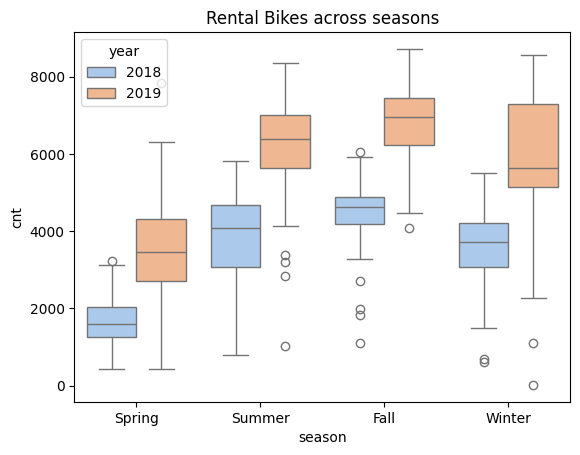

In [28]:
data['season']=pd.Categorical(data['season']).rename_categories(['Spring','Summer','Fall','Winter'])
ax=sns.boxplot(data,x='season',y='cnt',hue='year',palette=default_palette)
ax.set_title('Rental Bikes across seasons')
pyplot.show()

#### Inference
<font color='brown'>
1. There is a jump in number in the number of rented bikes in summer, fall. <br/>
2. The spread of rented bikes is high in each season in the year 2019 <br/>
</font>

#### Monthwise Distribution of Rental Bikes

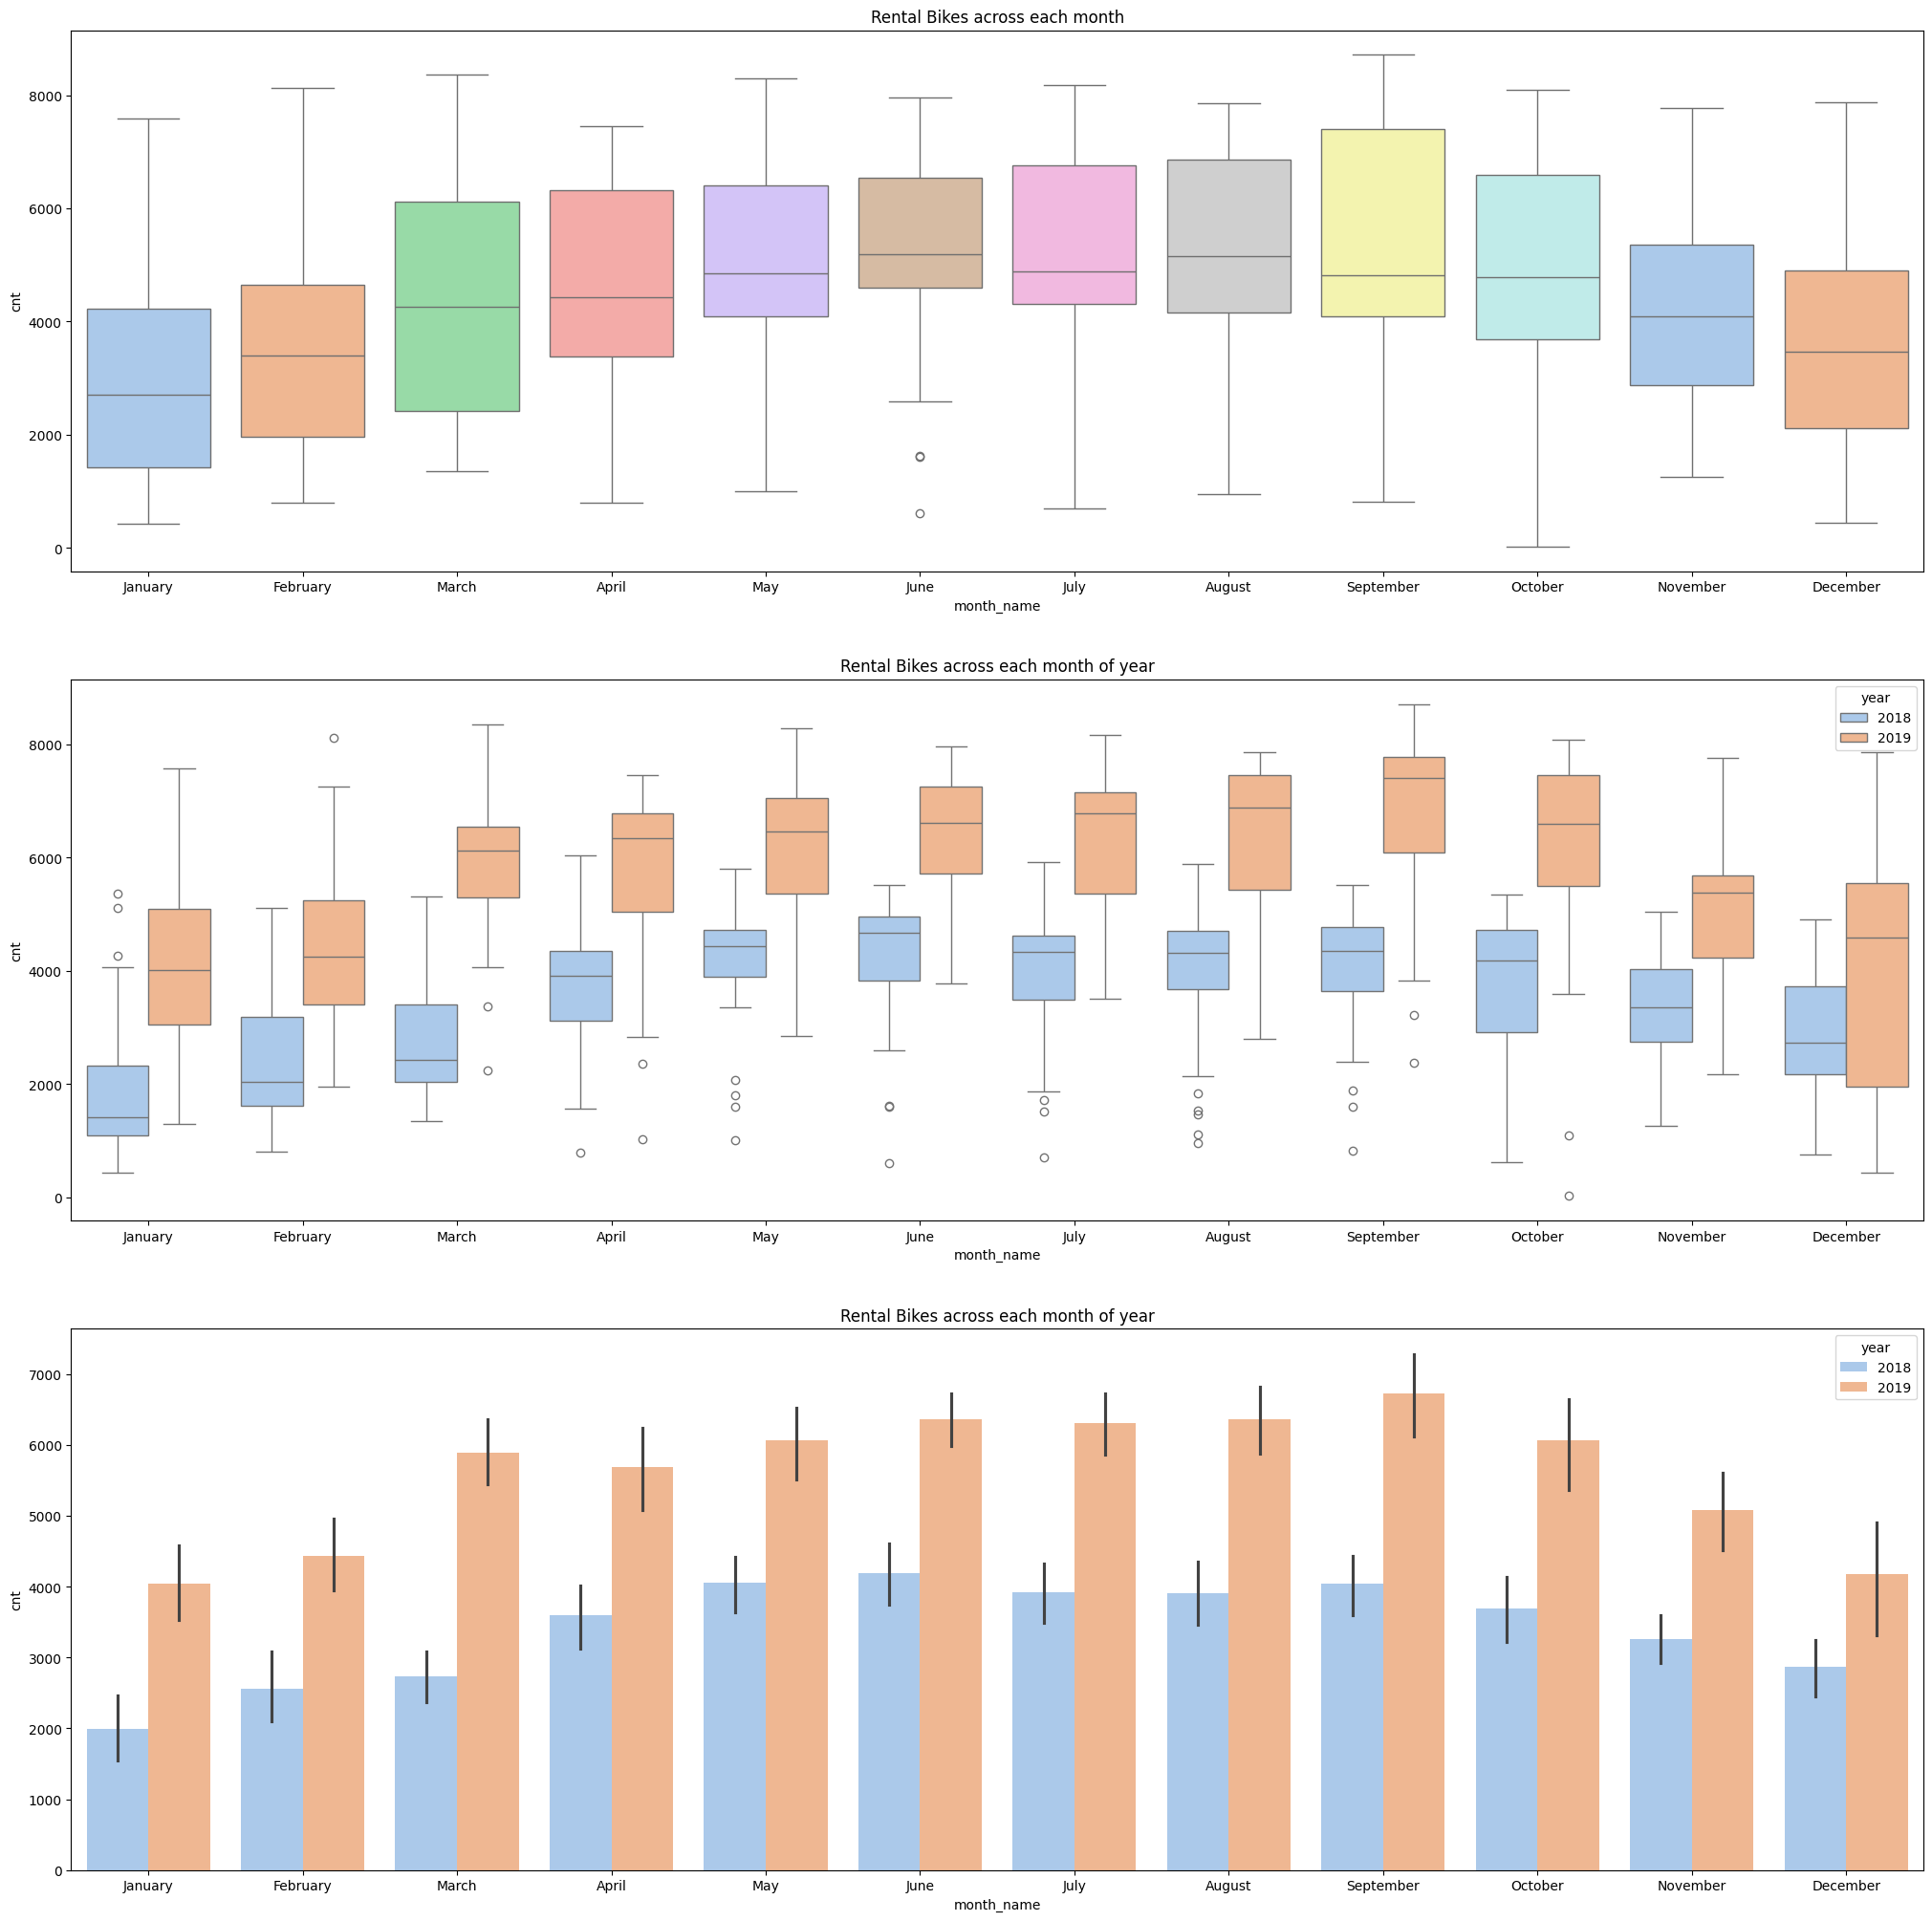

In [29]:
pyplot.figure(figsize=(25,25))
pyplot.subplot(3,1,1)
ax=sns.boxplot(data,x='month_name',y='cnt',palette=default_palette)
ax.set_title('Rental Bikes across each month')
pyplot.subplot(3,1,2)
ax2=sns.boxplot(data,x='month_name',y='cnt',hue='year',palette=default_palette)
ax2.set_title('Rental Bikes across each month of year')
pyplot.subplot(3,1,3)
ax3=sns.barplot(data,x='month_name',y='cnt',hue='year',palette=default_palette)
ax3.set_title('Rental Bikes across each month of year')
pyplot.show()

#### Inference
<font color='brown'>
1. The rental bike counts are gradually increasing from the year start, peaks in May-September timeframe <br/>
2. The spread in december 2019 is wider ranging below 2000 and above 4000     
</font>

#### Daywise Distribution of Rental Bikes


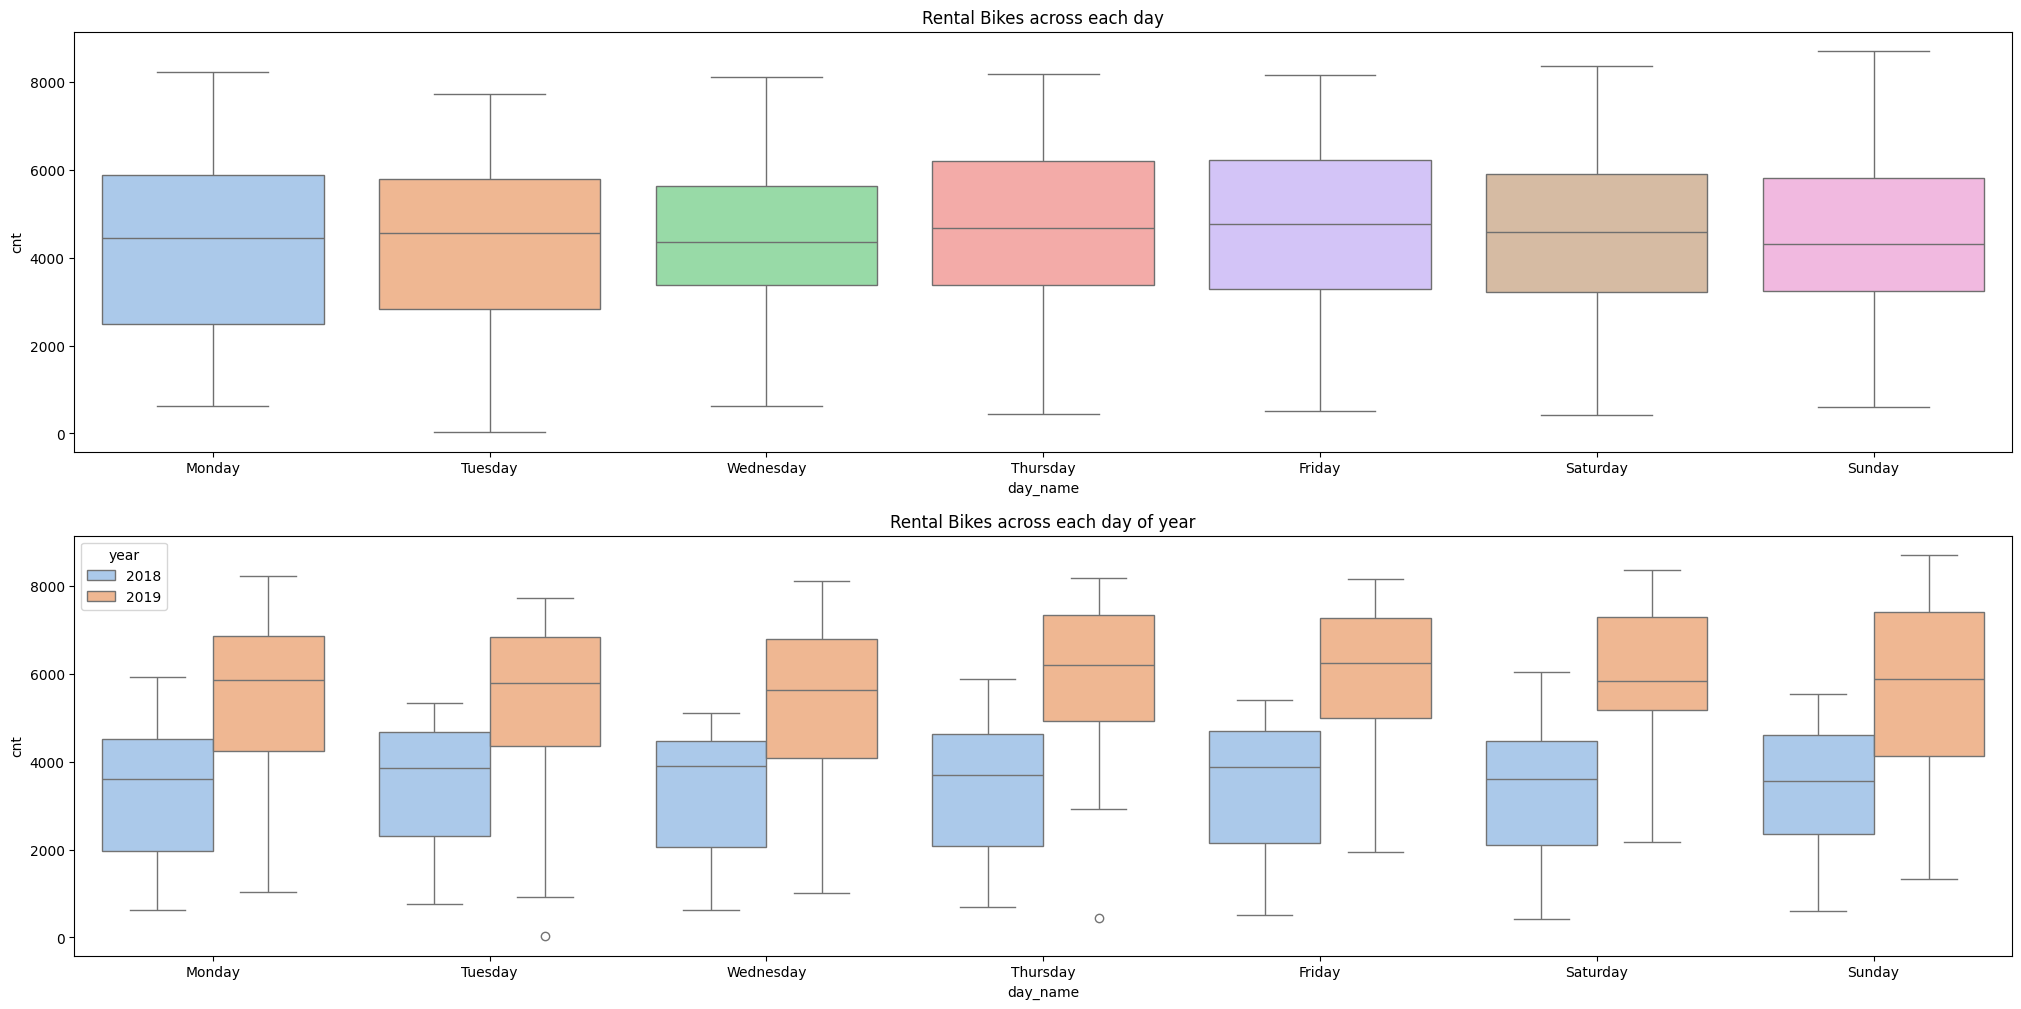

In [30]:

pyplot.figure(figsize=(25,12))
pyplot.subplot(2,1,1)
ax=sns.boxplot(data,x='day_name',y='cnt',palette=default_palette)
ax.set_title('Rental Bikes across each day')
pyplot.subplot(2,1,2)
ax2=sns.boxplot(data,x='day_name',y='cnt',hue='year',palette=default_palette)
ax2.set_title('Rental Bikes across each day of year')
pyplot.show()

#### Inference
<font color='brown'>
1. The median lies more or less same for the week <br/>
2. The spread is little thin on wednesdays, otherwise there does not seem to be a major difference <br/>
3. 2019s have wider spread on sunday ranging from 4k to > 6k
</font>

#### Rental Bikes in Holidays

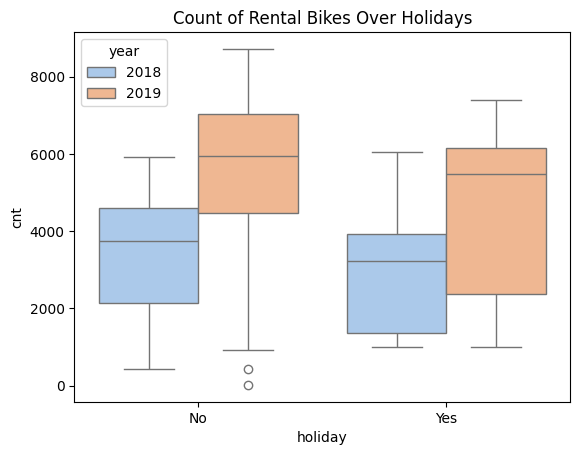

In [31]:
ax=sns.boxplot(data,x='holiday',y='cnt',palette=default_palette,hue='year')
ax.set_title("Count of Rental Bikes Over Holidays")
pyplot.xticks(ticks=[0,1],labels=['No','Yes'])
pyplot.show()

#### Inference
<font color='brown'>
1. Non holidays have the median higher than the holidays <br/>
2. Even the 25th percentile numbers are lesser compared to that of non holidays <br/>
</font>

#### Rental Bikes in Working days

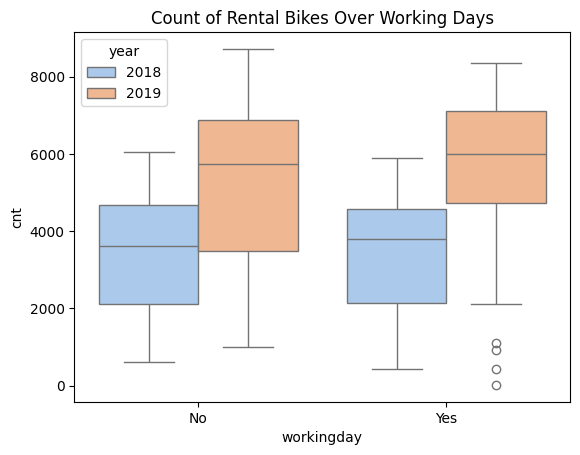

In [32]:
ax=sns.boxplot(data,x='workingday',y='cnt',palette=default_palette,hue='year')
ax.set_title("Count of Rental Bikes Over Working Days")
pyplot.xticks(ticks=[0,1],labels=['No','Yes'])
pyplot.show()

#### Inference
<font color='brown'>
1. The spread of 2018 seem to be same for working and non working days <br/>
2. The 2019 seems to have a jump in the 25th percentile numbers, the median is slightly higher than that of 2018<br/>
</font>

#### The distribution of Rental Bike as a factor of number of days passed from 2018

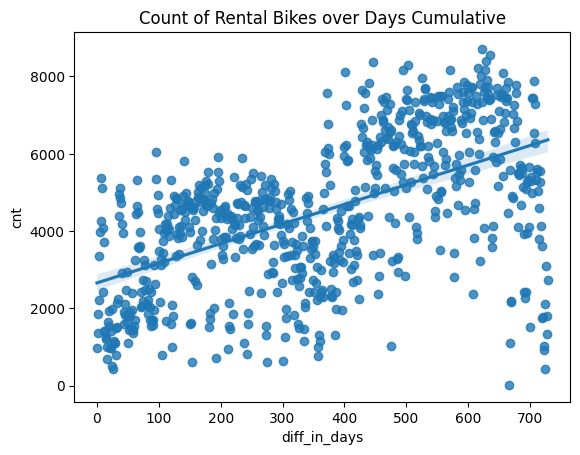

In [33]:
ax=sns.regplot(data,x='diff_in_days',y='cnt')
ax.set_title("Count of Rental Bikes over Days Cumulative")
pyplot.show()

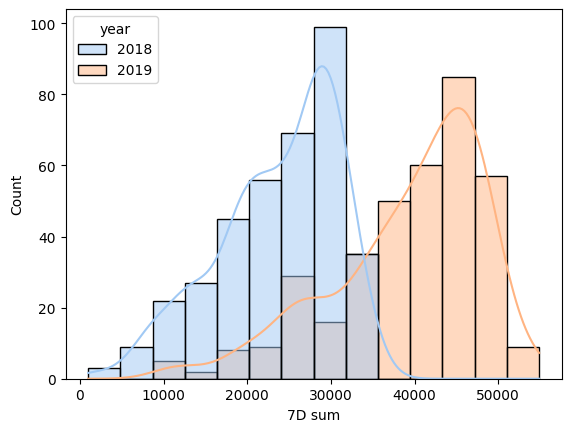

In [34]:
sns.histplot(data,x='7D sum',hue='year',kde=True,palette=default_palette)
ax.set_title("7 Day rolling count of Rental Bikes")
pyplot.show()

#### Fortnightly Trends in count of Rental Bikes across Years

In [35]:
data['bins']=pd.cut(data['diff_in_days'],bins=[15*x for x in range(-1,50)],labels=['fortnight_'+str(x) for x in range(-1,49)])

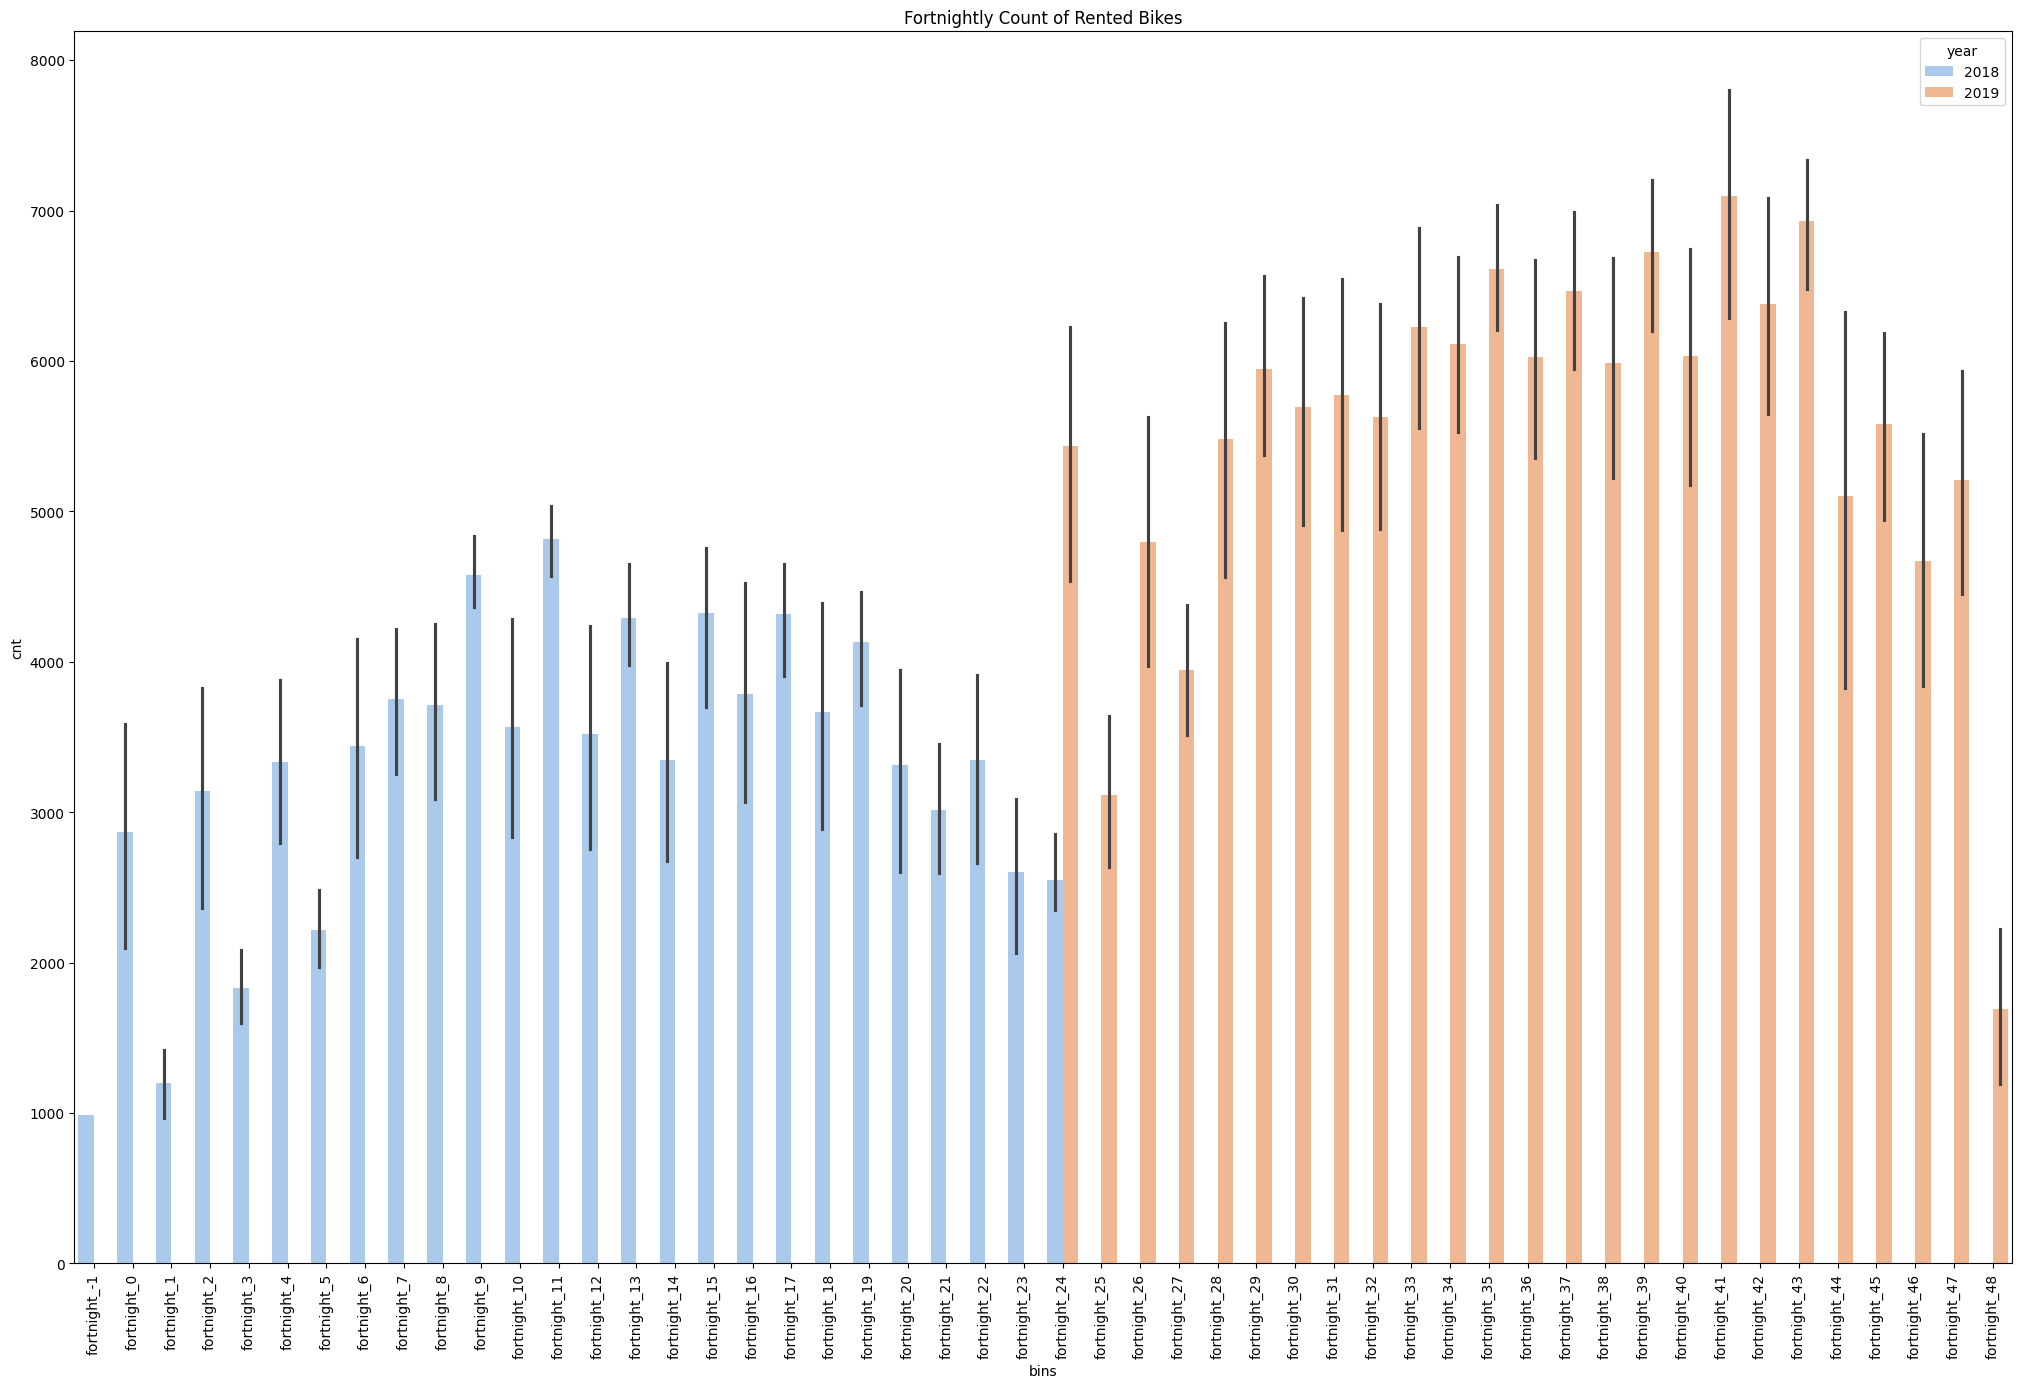

In [36]:
pyplot.figure(figsize=(25,16))
ax=sns.barplot(data,x='bins',y='cnt',hue='year',palette=default_palette)
ax.set_title("Fortnightly Count of Rented Bikes")
pyplot.xticks(rotation=90)
pyplot.show()

#### Inference
<font color='brown'>
1. The histplot for fortnightly trends shows the rented bikes are gradually increasing during year start and dipping on year end <br/>
2. The 7 Day rolling sum shows peaks are at 30 and 45k respectively<br/>
</font>

#### No of Rental Bikes w.r.t Month Start and Month End 

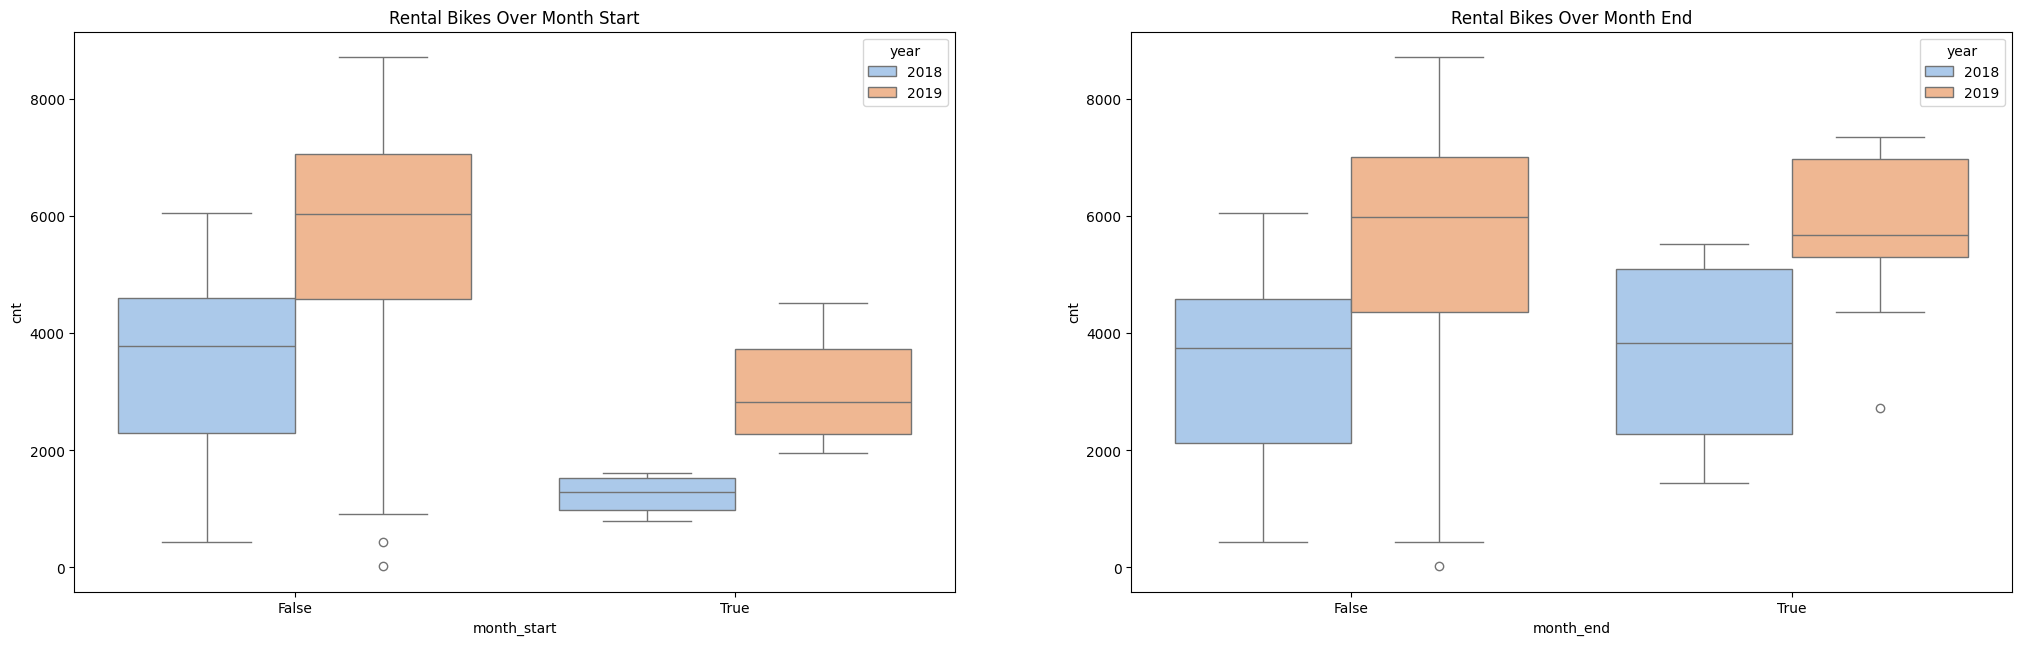

In [37]:
pyplot.figure(figsize=(25,16))
pyplot.subplot(2,2,1)
ax1=sns.boxplot(data,x='month_start',y='cnt',hue='year',palette=default_palette)
ax1.set_title("Rental Bikes Over Month Start")

pyplot.subplot(2,2,2)
ax2=sns.boxplot(data,x='month_end',y='cnt',hue='year',palette=default_palette)
ax2.set_title("Rental Bikes Over Month End")

pyplot.show()

<font color='brown'>
1. The box plot shows month start having very less spread compared to that of other days <br/>
2. However the same is not true for month end.
</font>

#### No of Rental Bikes w.r.t Year Start and Year End 

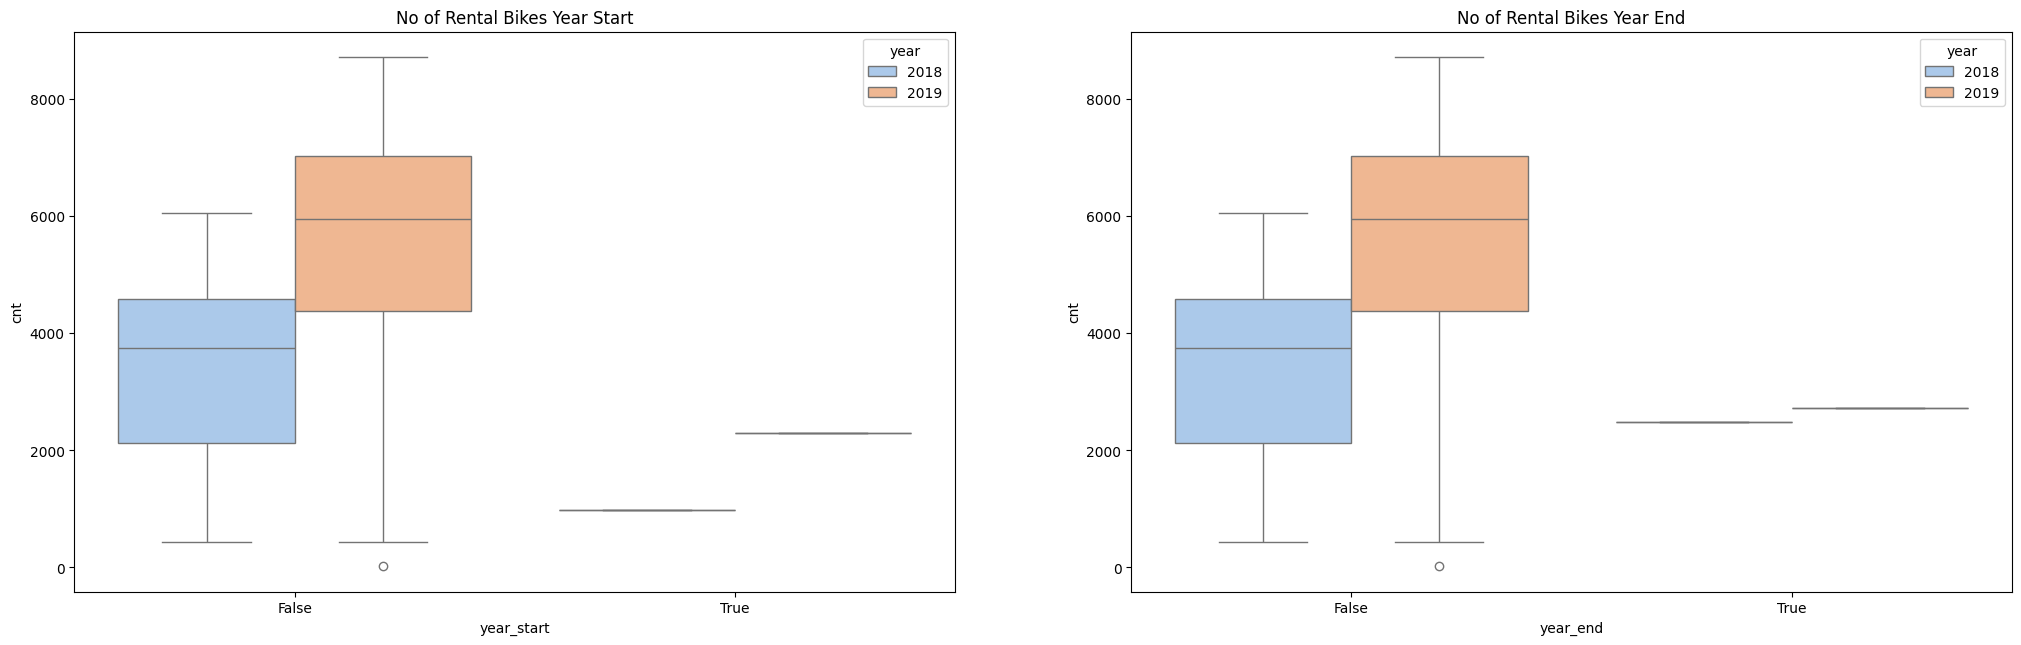

In [38]:
pyplot.figure(figsize=(25,16))
pyplot.subplot(2,2,1)
ax1=sns.boxplot(data,x='year_start',y='cnt',hue='year',palette=default_palette)
ax1.set_title("No of Rental Bikes Year Start")
pyplot.subplot(2,2,2)
ax2=sns.boxplot(data,x='year_end',y='cnt',hue='year',palette=default_palette)
ax2.set_title("No of Rental Bikes Year End")
pyplot.show()

#### Inference
<font color='brown'>
1. The year start and year end does not show a significant impact <br/>
</font>

#### No of Rental Bikes Based on the Weather Type

In [39]:
data['weathersit']=data['weathersit'].astype("category")
data['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [40]:
data['weather_desc']=pd.Categorical(data['weathersit']).rename_categories(['Cloudy','Misty','Snowy'])

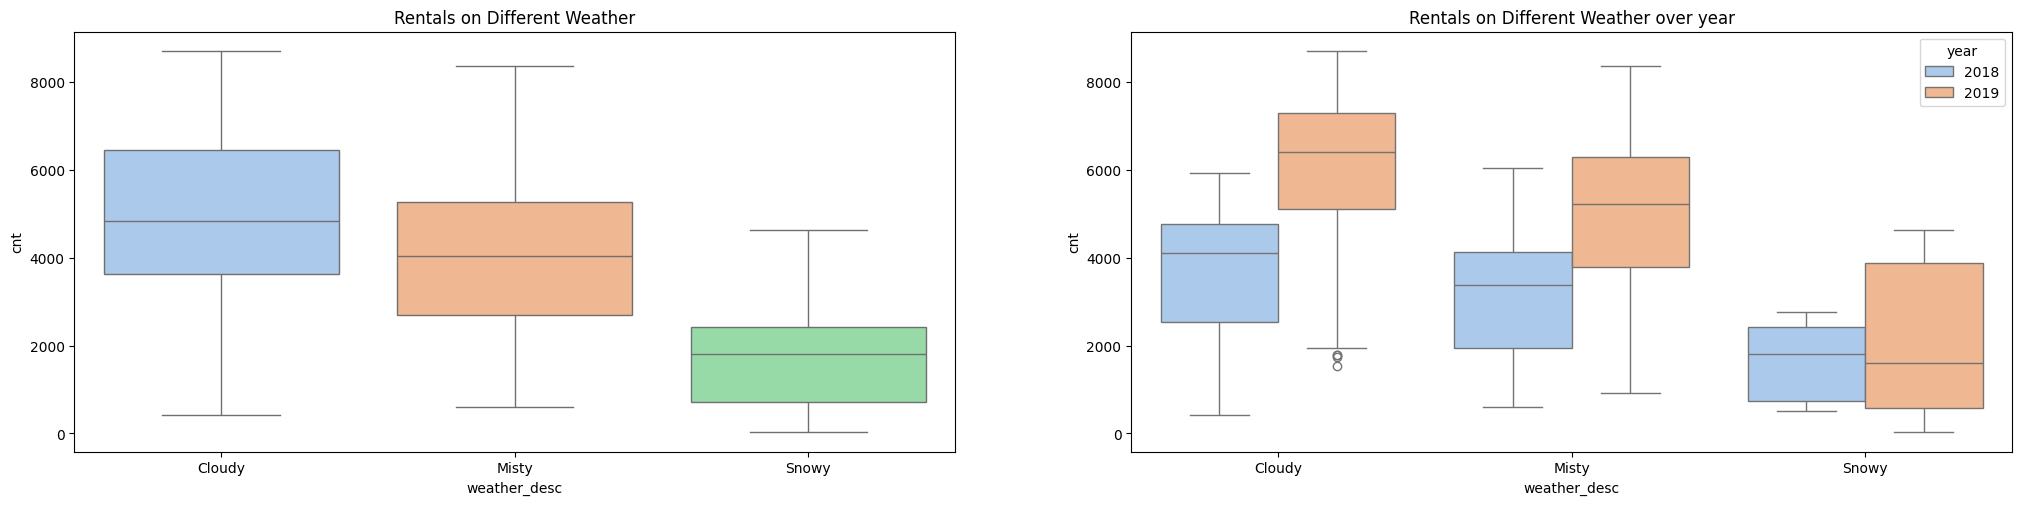

In [41]:
pyplot.figure(figsize=(25,12))
pyplot.subplot(2,2,1)
ax=sns.boxplot(data,x='weather_desc',y='cnt',palette=default_palette)
ax.set_title("Rentals on Different Weather")
pyplot.subplot(2,2,2)
ax2=sns.boxplot(data,x='weather_desc',y='cnt',hue='year',palette=default_palette)
ax2.set_title("Rentals on Different Weather over year")
pyplot.show()

#### Inference
<font color='brown'>
1. The bike rentals are dipping as the weather tends towards Misty and Snowy.<br/>
</font>

#### No of Casual and Registered Users

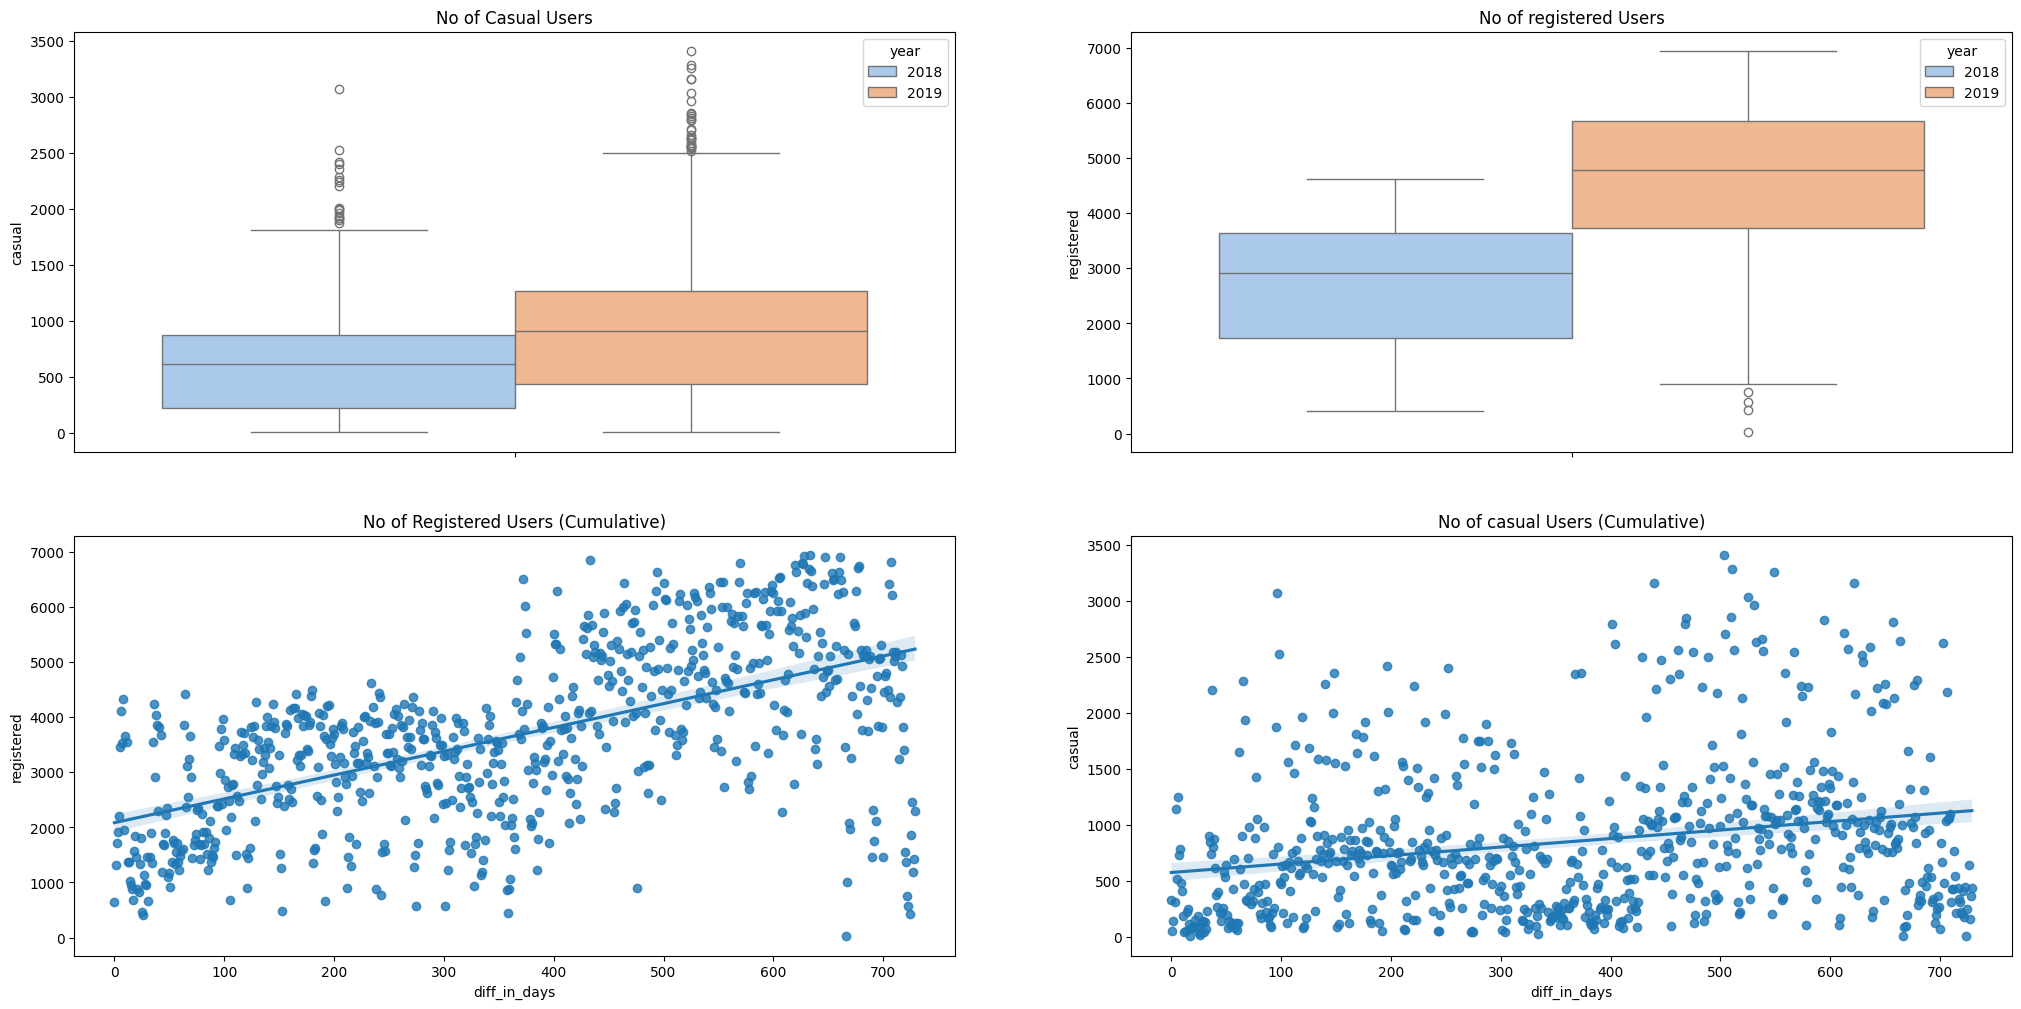

In [42]:
pyplot.figure(figsize=(25,12))

pyplot.subplot(2,2,1)
ax1=sns.boxplot(data,y='casual',hue='year',palette=default_palette)
ax1.set_title("No of Casual Users")

pyplot.subplot(2,2,2)
ax2=sns.boxplot(data,y='registered',hue='year',palette=default_palette)
ax2.set_title("No of registered Users")

pyplot.subplot(2,2,3)
ax3=sns.regplot(data,x='diff_in_days',y='registered')
ax3.set_title("No of Registered Users (Cumulative)")

pyplot.subplot(2,2,4)
ax4=sns.regplot(data,x='diff_in_days',y='casual')
ax4.set_title("No of casual Users (Cumulative)")

pyplot.show()

#### Effect of Temperature, Humidity, Windspeed on Rental Bike Count

In [43]:
data['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [44]:
data['atemp'].describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

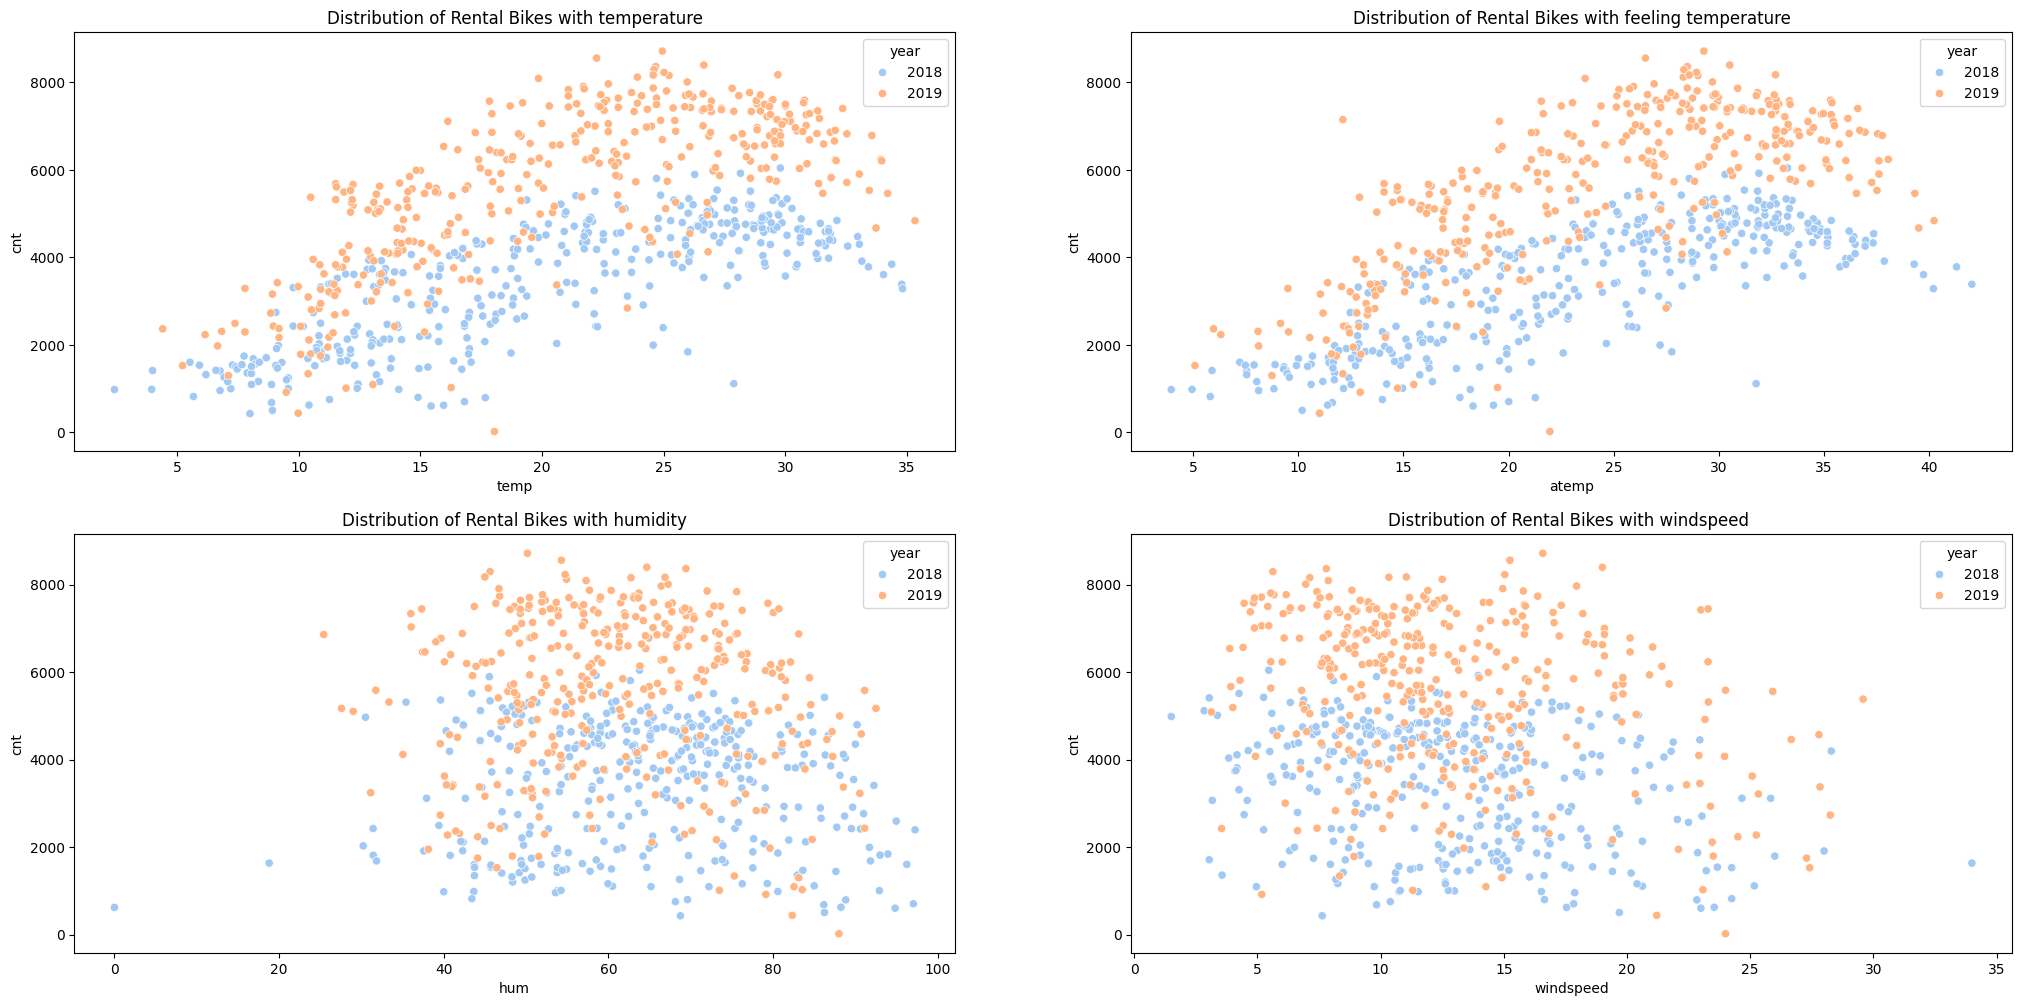

In [45]:
pyplot.figure(figsize=(25,25))

pyplot.subplot(4,2,1)
ax=sns.scatterplot(data,x='temp',y='cnt',hue='year',palette=default_palette)
ax.set_title("Distribution of Rental Bikes with temperature")

pyplot.subplot(4,2,2)
ax2=sns.scatterplot(data,x='atemp',y='cnt',hue='year',palette=default_palette)
ax2.set_title("Distribution of Rental Bikes with feeling temperature")


pyplot.subplot(4,2,3)
ax3=sns.scatterplot(data,x='hum',y='cnt',hue='year',palette=default_palette)
ax3.set_title("Distribution of Rental Bikes with humidity")

pyplot.subplot(4,2,4)
ax4=sns.scatterplot(data,x='windspeed',y='cnt',hue='year',palette=default_palette)
ax4.set_title("Distribution of Rental Bikes with windspeed ")
pyplot.show()


#### Inference
<font color='brown'>
    1. The temperature and feeling temperature shows a linear relationship with number of rented bikes  <br/>
    2. The humidity, windspeed doesnot explain much of linear relationship, but there is a downward trend in the x-axis mainly visible for year 2019  <br/>
</font>

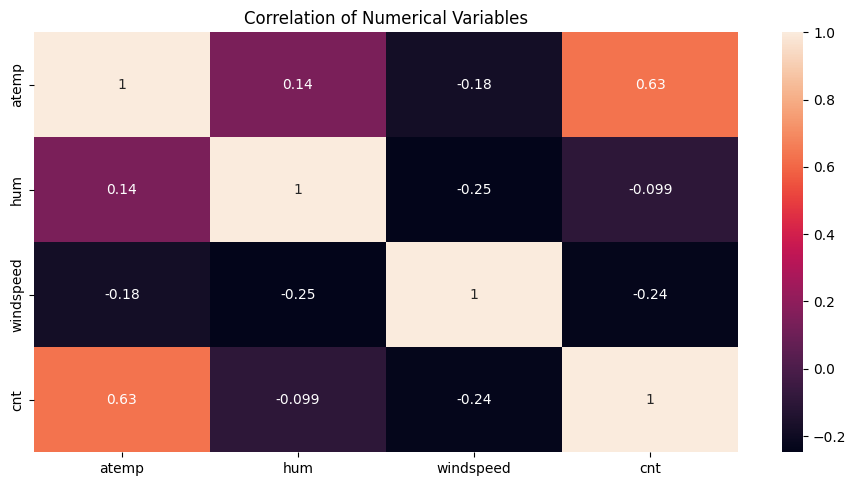

In [46]:
pyplot.figure(figsize=(25,12))
pyplot.subplot(2,2,1)
ax=sns.heatmap(data[['atemp','hum','windspeed','cnt']].corr(),annot=True)
ax.set_title("Correlation of Numerical Variables")
pyplot.show()

#### Observing if there are any differences in temperature , humidity between 2018 and 2019

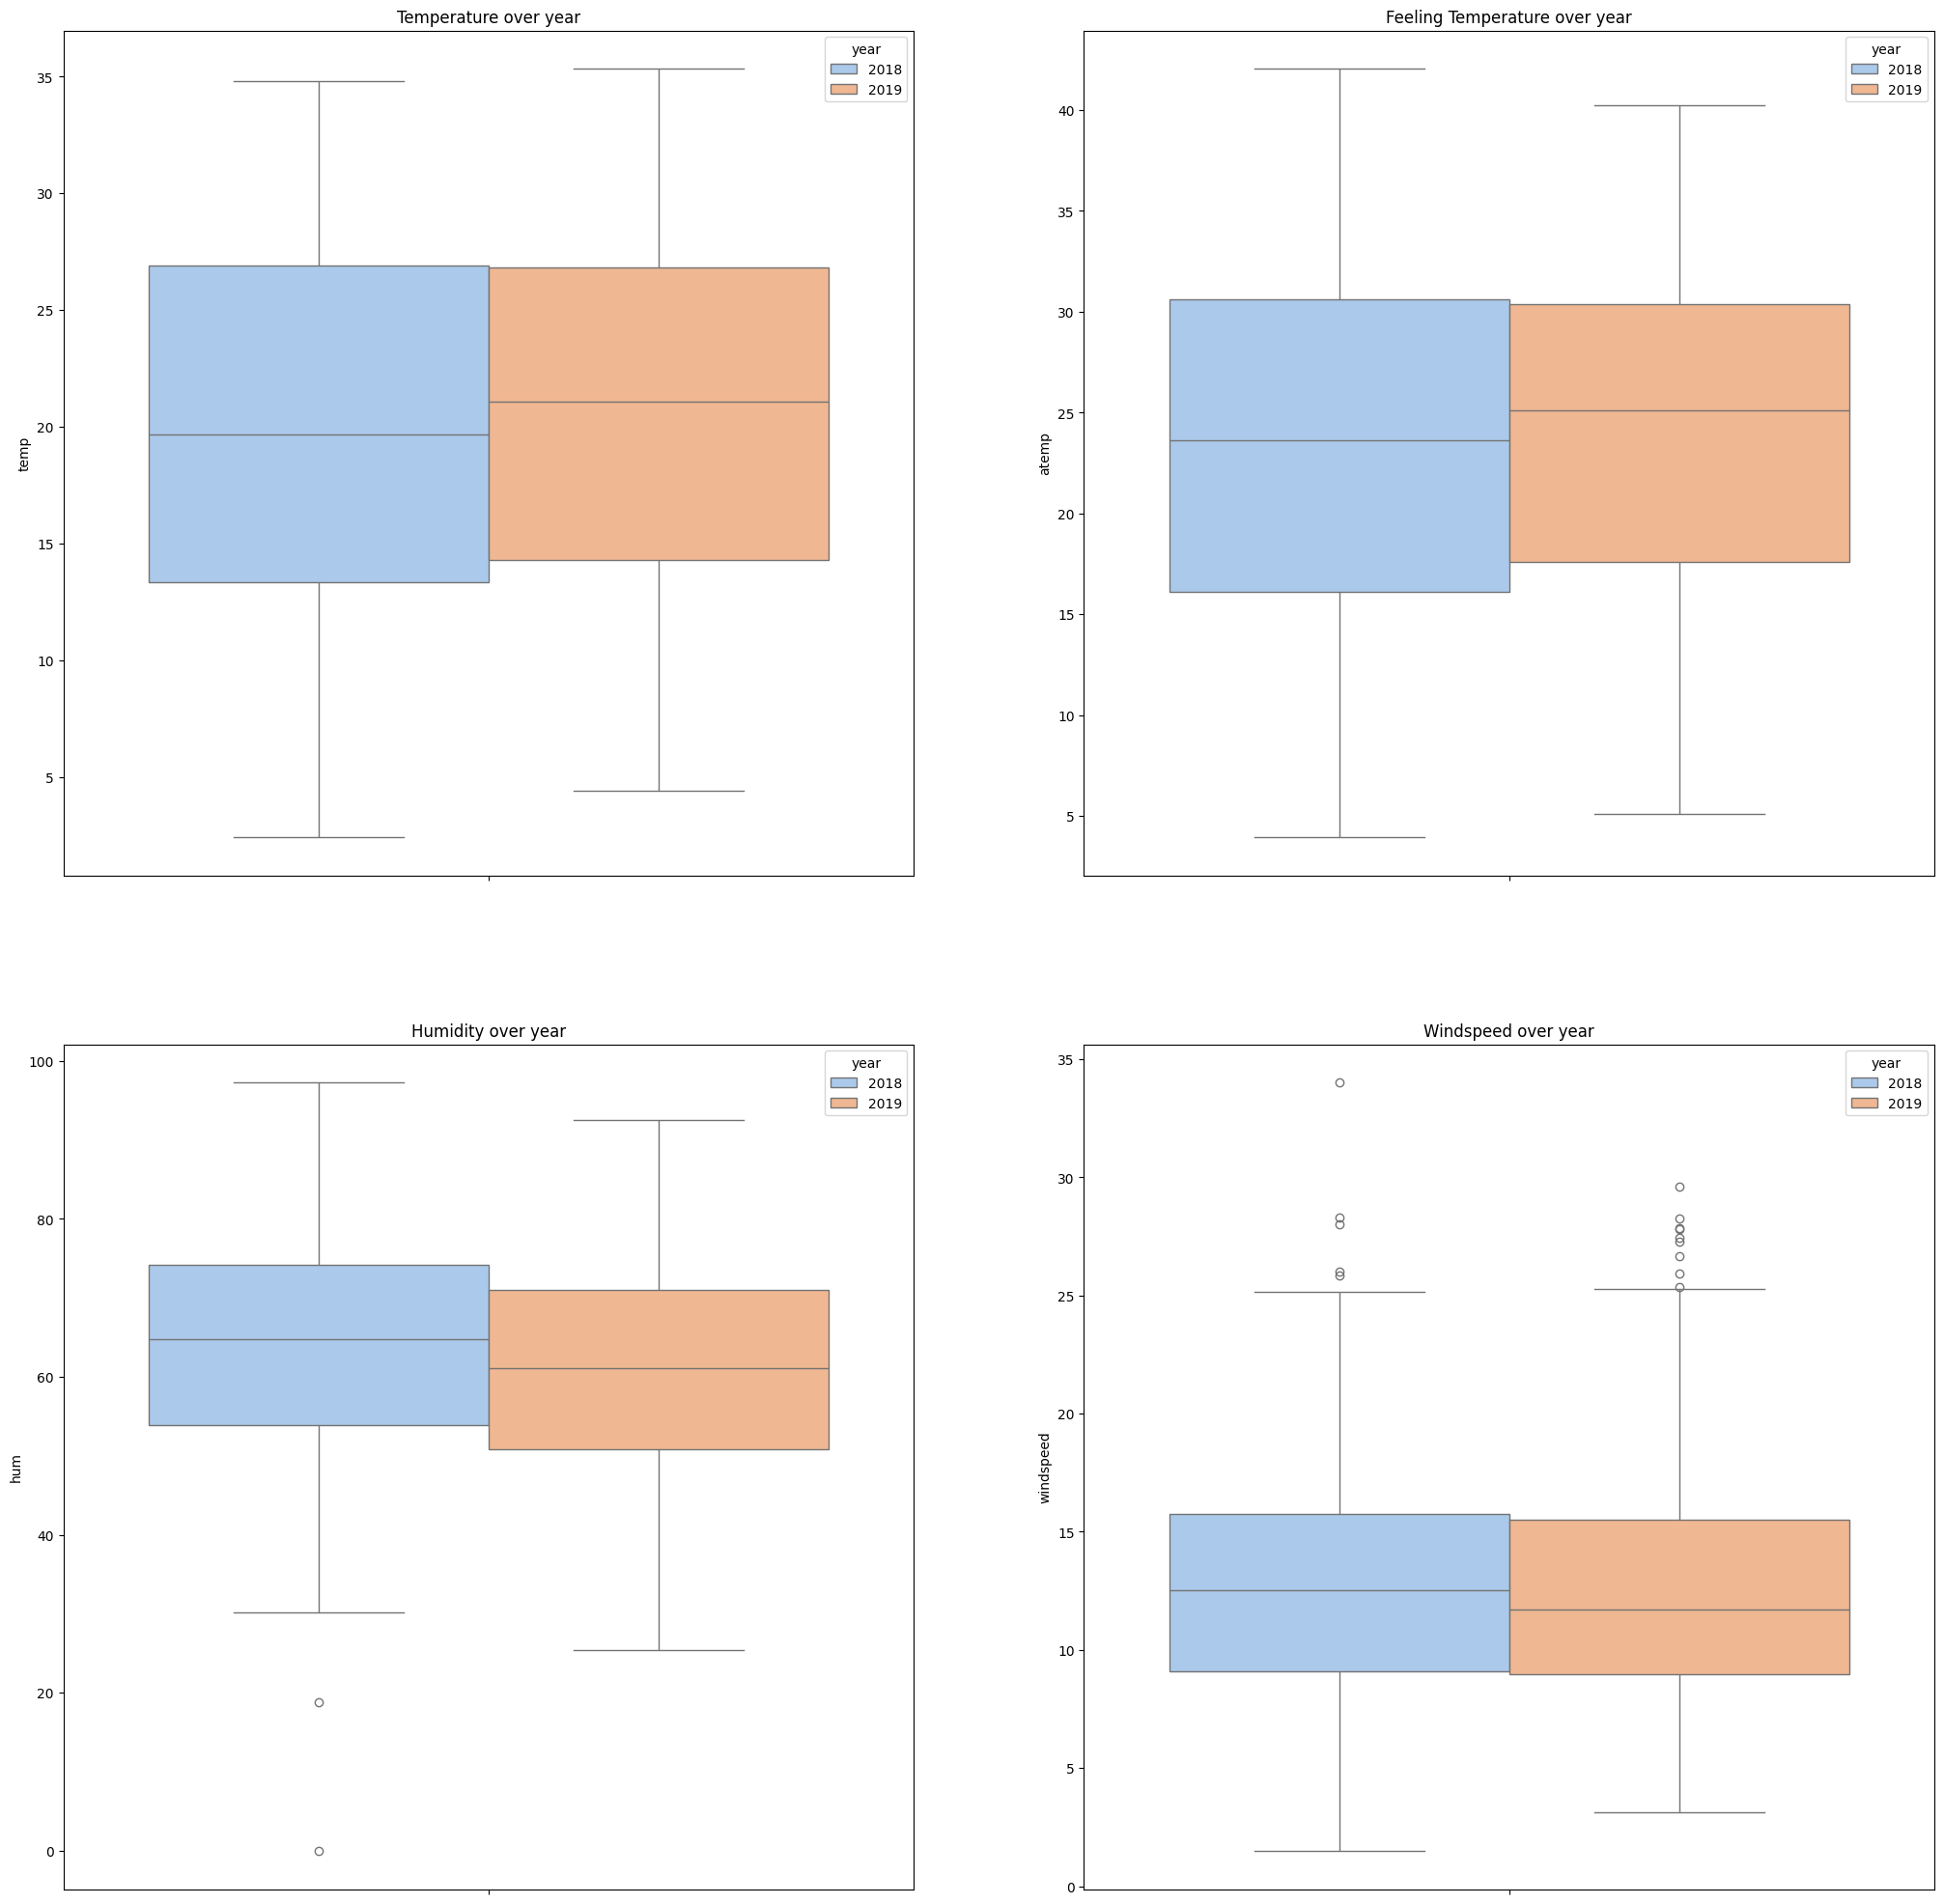

In [47]:
pyplot.figure(figsize=(25,25))

pyplot.subplot(2,2,1)
ax1=sns.boxplot(data,y='temp',hue='year',palette=default_palette)
ax1.set_title("Temperature over year")
pyplot.subplot(2,2,2)
ax2=sns.boxplot(data,y='atemp',hue='year',palette=default_palette)
ax2.set_title("Feeling Temperature over year")
pyplot.subplot(2,2,3)
ax3=sns.boxplot(data,y='hum',hue='year',palette=default_palette)
ax3.set_title("Humidity over year")
pyplot.subplot(2,2,4)
ax4=sns.boxplot(data,y='windspeed',hue='year',palette=default_palette)
ax4.set_title("Windspeed over year")
pyplot.show()

#### Analysing Linear Relationships of Independent Variable with Target Variable

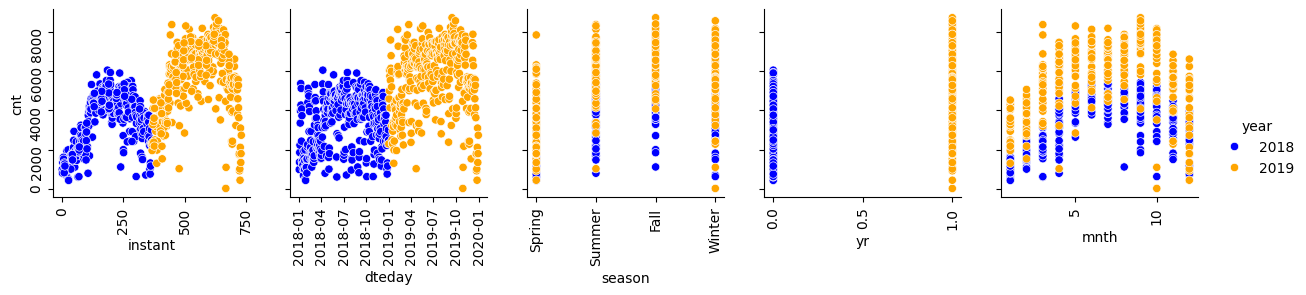

In [48]:
fig=sns.pairplot(data,x_vars=data.columns[:5],y_vars='cnt',palette='blend:blue,orange',hue='year')
for ax in fig.axes.flatten():
    ax.tick_params(rotation=90)
pyplot.show()

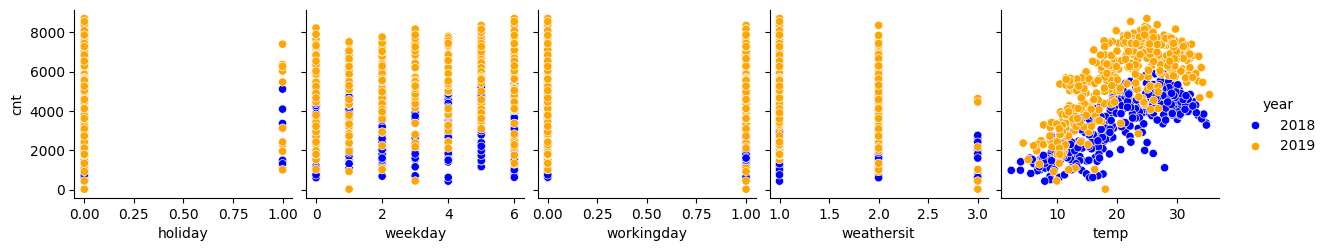

In [49]:
sns.pairplot(data,x_vars=data.columns[5:10],y_vars='cnt',palette='blend:blue,orange',hue='year')
pyplot.show()

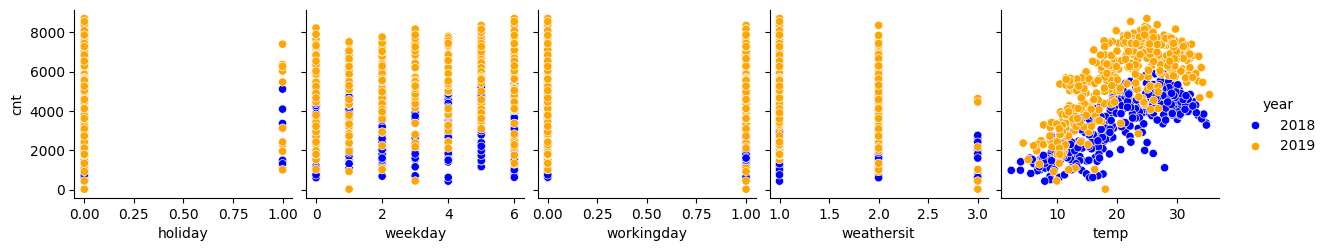

In [50]:
sns.pairplot(data,x_vars=data.columns[5:10],y_vars='cnt',palette='blend:blue,orange',hue='year')
pyplot.show()

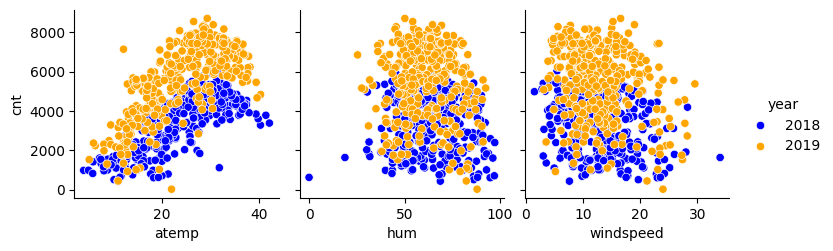

In [51]:
sns.pairplot(data,x_vars=data.columns[10:13],y_vars='cnt',palette='blend:blue,orange',hue='year')
pyplot.show()

<Figure size 2500x1600 with 0 Axes>

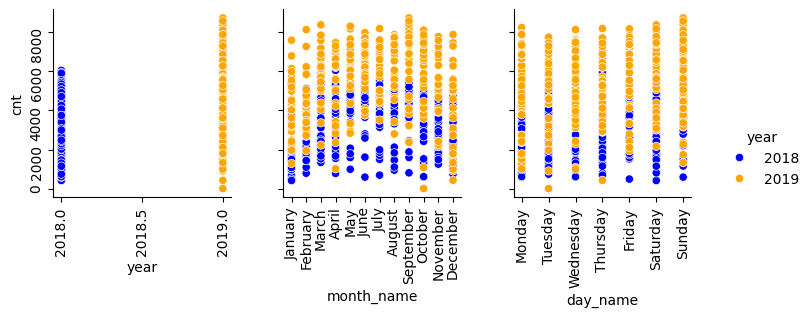

In [52]:
pyplot.figure(figsize=(25,16))
plot_=data[data.columns[15:20]]
plot_.drop(columns=['cnt','diff_in_days'],inplace=True)
fig=sns.pairplot(data,x_vars=plot_.columns,y_vars='cnt',palette='blend:blue,orange',hue='year')
for ax in fig.axes.flatten():
    ax.tick_params(rotation=90)
pyplot.show()

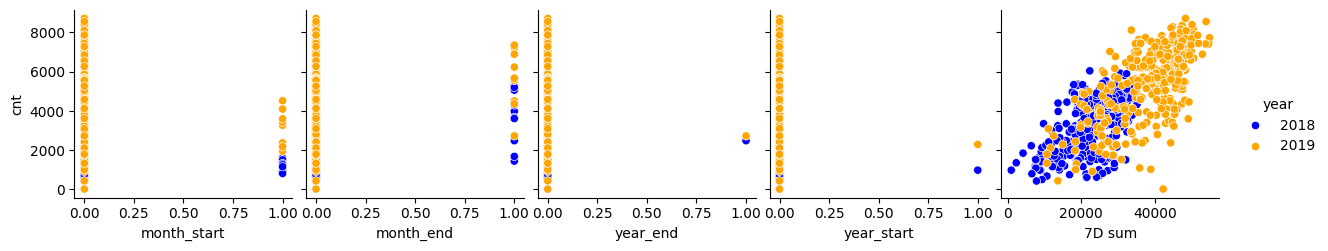

In [53]:
sns.pairplot(data,x_vars=data.columns[20:25],y_vars='cnt',palette='blend:blue,orange',hue='year')
pyplot.show()

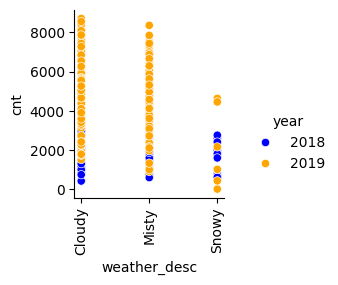

In [54]:
plot_=data[data.columns[25:30]]
plot_.drop(columns='bins',inplace=True)
sns.pairplot(data,x_vars=plot_.columns,y_vars='cnt',palette='blend:blue,orange',hue='year')
pyplot.xticks(rotation=90)
pyplot.show()

#### Pearson R Coefficients

In [55]:
def pearson_r(data_, cols_):
    pear_r=pd.DataFrame({"features":[],"Pearson R":[]})
    pear_r["Pearson R"]=[stats.pearsonr(data_[i],data_['cnt']).statistic for i in cols_]
    pear_r["features"]=lr_col
    return pear_r.sort_values(by='Pearson R',ascending=False)

In [56]:
data_=data.copy()
data_['season']=data_['season'].map({"Spring":1,"Fall":3,"Summer":2,"Winter":4})
lr_col=['atemp','temp','hum','windspeed','weathersit','mnth','workingday','holiday','weekday','yr','season']
pearson_r(data_,lr_col)

,features,Pearson R
0,atemp,0.630685
1,temp,0.627044
9,yr,0.569728
10,season,0.404584
5,mnth,0.278191
8,weekday,0.067534
6,workingday,0.062542
7,holiday,-0.068764
2,hum,-0.098543
3,windspeed,-0.235132


#### Inference
<font color='brown'> 
    <h5>We can observe the Linear upward trend in below columns</h5>
       <ul>
           1. Season<br/>
           2. Year<br/>
           3. Mnth<br/>
           4. Weekday<br/>
           5. atemp<br/>
           6. temp<br/>
        </ul>
    <h5>We can observe the Linear downward trend in below columns</h5>
           <ul>               
           7. hum  <br/>
           8. windspeed<br/>
           </ul>    
    <h5>'Weathersit','workingday' and 'holiday' does not show a trend as such. but there is a difference in their spread based on the values</h5>
</font>

#### Creating Dummies

In [57]:
dummy_seasons=pd.get_dummies(data['season'],dtype=int,drop_first=True)

In [58]:
dummy_weather=pd.get_dummies(data['weather_desc'],dtype=int)
dummy_weather.drop(columns='Snowy',inplace=True)

In [59]:
dummy_months=pd.get_dummies(data['month_name'],dtype='int')
dummy_months.drop(columns='January',inplace=True)

In [60]:
dummy_days=pd.get_dummies(data['day_name'],dtype='int')
dummy_days.drop(columns='Sunday',inplace=True)

In [61]:
engineered_data=data.drop(columns=['dteday','instant','mnth','season','year','weekday','month_name','day_name','weathersit','bins','diff_in_days','weather_desc','7D sum','temp','casual','registered'])

In [62]:
engineered_data=pd.concat([engineered_data,dummy_seasons,dummy_weather,dummy_months,dummy_days],axis=1)

In [63]:
engineered_data.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'month_start', 'month_end', 'year_end', 'year_start', 'Summer', 'Fall',
       'Winter', 'Cloudy', 'Misty', 'April', 'August', 'December', 'February',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [64]:
engineered_data=engineered_data.reindex(['yr','year_end', 'year_start','February','March','April','May',
        'June', 'July','August',
       'September','October','November','December','month_start',
       'month_end', 'Monday','Tuesday', 'Wednesday','Thursday', 'Friday','Saturday',
        'holiday', 'workingday', 'atemp', 'hum', 'windspeed','Cloudy', 'Misty', 'cnt','Summer', 'Fall', 'Winter'],axis=1)

In [65]:
engineered_data.year_end=engineered_data.year_end.astype('int')

In [66]:
engineered_data.year_start=engineered_data.year_start.astype('int')

In [67]:
engineered_data.month_start=engineered_data.month_start.astype('int')

In [68]:
engineered_data.month_end=engineered_data.month_start.astype('int')

In [69]:
engineered_data.head()

,yr,year_end,year_start,February,March,April,May,June,July,August,...,workingday,atemp,hum,windspeed,Cloudy,Misty,cnt,Summer,Fall,Winter
0,0,0,1,0,0,0,0,0,0,0,...,0,18.18125,80.5833,10.749882,0,1,985,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,1,11.72650,82.9565,3.565271,0,1,1360,0,0,0
59,0,0,0,0,0,0,0,0,0,0,...,1,13.19395,53.5000,14.500475,1,0,1851,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,1,14.17270,68.6250,17.333436,0,1,2227,1,0,0
120,0,0,0,0,0,0,0,0,0,0,...,0,22.41020,76.2083,7.125718,0,1,3351,1,0,0


#### Feature Scaling

In [70]:
scaler=MinMaxScaler()

In [71]:
y=pd.DataFrame(engineered_data.pop('cnt'))

In [72]:
X=engineered_data

In [73]:
X.shape,y.shape

((730, 32), (730, 1))

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [75]:
X_train

,yr,year_end,year_start,February,March,April,May,June,July,August,...,holiday,workingday,atemp,hum,windspeed,Cloudy,Misty,Summer,Fall,Winter
653,1,0,0,0,0,0,0,0,0,0,...,0,1,23.04230,55.8333,12.208807,1,0,0,0,1
576,1,0,0,0,0,0,0,0,1,0,...,0,1,33.14480,70.4167,11.083475,1,0,0,1,0
426,1,0,0,0,1,0,0,0,0,0,...,0,0,20.67460,62.1250,10.792293,0,1,0,0,0
728,1,0,0,0,0,0,0,0,0,0,...,0,0,11.58500,48.3333,23.500518,1,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,...,0,0,18.87520,48.9583,8.708325,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1,0,0,0,0,0,0,0,0,1,...,0,1,13.32105,72.2917,8.959307,0,1,0,0,0
53,0,0,0,1,0,0,0,0,0,0,...,0,1,12.28585,42.3043,6.305571,1,0,0,0,0
350,0,0,0,0,0,0,0,0,0,0,...,0,0,12.46855,56.0833,16.292189,0,1,0,0,1
79,0,0,0,0,1,0,0,0,0,0,...,0,1,20.48675,73.7391,19.348461,0,1,1,0,0


In [76]:
columns_to_scale=['atemp','hum','windspeed']

In [77]:
X_train[columns_to_scale]=scaler.fit_transform(X_train[columns_to_scale])

In [78]:
pd.set_option('display.max_columns',None)

In [79]:
X_train

,yr,year_end,year_start,February,March,April,May,June,July,August,September,October,November,December,month_start,month_end,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,holiday,workingday,atemp,hum,windspeed,Cloudy,Misty,Summer,Fall,Winter
653,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0.501133,0.575354,0.329497,1,0,0,0,1
576,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.766351,0.725633,0.294871,1,0,0,1,0
426,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.438975,0.640189,0.285911,0,1,0,0,0
728,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.200348,0.498067,0.676936,1,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.391735,0.504508,0.221789,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.245924,0.744955,0.229511,0,1,0,0,0
53,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.218747,0.435939,0.147857,1,0,0,0,0
350,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.223544,0.577930,0.455140,0,1,0,0,1
79,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.434043,0.759870,0.549180,0,1,1,0,0


In [80]:
y_train

,cnt
653,7534
576,7216
426,4066
728,1796
482,4220
...,...
403,2802
53,1917
350,2739
79,2077


#### Feature Selection

In [81]:
rfe=RFE(estimator=LinearRegression(),n_features_to_select=25, step=1)

In [82]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [83]:
rfe.ranking_

array([1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 5, 1, 1, 1, 7, 6, 1, 8, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [84]:
X_train.columns[rfe.support_]

Index(['yr', 'year_start', 'February', 'March', 'April', 'May', 'June',
       'August', 'September', 'October', 'December', 'month_start',
       'month_end', 'Wednesday', 'Saturday', 'holiday', 'workingday', 'atemp',
       'hum', 'windspeed', 'Cloudy', 'Misty', 'Summer', 'Fall', 'Winter'],
      dtype='object')

#### Defining Variance Inflation Factor

In [85]:
def vif(X,col):
    vif=pd.DataFrame({'vif':[],'col':[]})
    vif['vif']=[variance_inflation_factor(X,i) for i in range(X[col].shape[1])]
    vif['col']=col
    return vif

#### Creating a Model

In [86]:
def create_model(X_,y_,X_col):
    X_sm=sm.add_constant(X_[X_col])
    model_=sm.OLS(y_,X_sm)
    result_=model_.fit()
    return X_sm,y_,result_

#### Model 0   (All Variables)

In [87]:
X_train_sm,y_train,model0=create_model(X_train,y_train,X_train.columns)
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     80.34
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          2.00e-168
Time:                        21:06:19   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8334.
Df Residuals:                     479   BIC:                             8469.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -87.0753    431.977     -0.202      0.840    -935.879     761.729
yr           2017.7988     74.090     27.235      0.000    1872.218    2163.380
year_end      110.9807    836.958      0.133      0.895   -1533.583    1755.544
year_start   -739.6167    639.521     -1.157      0.248   -1996.230     516.997
February      133.5166    192.314      0.694      0.488    -244.366     511.399
March         370.2237    179.465      2.063      0.040      17.588     722.860
April         321.0495    198.002      1.621      0.106     -68.010     710.109
May           276.4400    197.661      1.399      0.163    -111.949     664.829
June          262.7833    199.600      1.317      0.189    -129.417     654.983
July          -72.3254    203.310     -0.356      0.722    -471.815     327.164
August        268.4399    190.621      1.408      0.160    -106.117     642.997
September     732.7183    191.570      3.825      0.000     356.296    1109.140
October       285.9382    200.856      1.424      0.155    -108.729     680.605
November      -41.0305    194.359     -0.211      0.833    -422.933     340.872
December      100.5932    183.620      0.548      0.584    -260.207     461.393
month_start  -188.0456    111.003     -1.694      0.091    -406.158      30.067
month_end    -188.0456    111.003     -1.694      0.091    -406.158      30.067
Monday        -24.5016    138.070     -0.177      0.859    -295.800     246.796
Tuesday       -34.6668    135.969     -0.255      0.799    -301.837     232.504
Wednesday    -120.5576    142.858     -0.844      0.399    -401.264     160.149
Thursday      -15.0241    141.522     -0.106      0.915    -293.105     263.057
Friday         43.0018    139.527      0.308      0.758    -231.159     317.163
Saturday      154.4856    144.966      1.066      0.287    -130.362     439.333
holiday      -346.5111    242.458     -1.429      0.154    -822.924     129.902
workingday    137.8558     92.403      1.492      0.136     -43.709     319.421
atemp        4402.9743    320.862     13.722      0.000    3772.502    5033.446
hum         -1296.4974    344.612     -3.762      0.000   -1973.635    -619.359
windspeed   -1606.1242    247.625     -6.486      0.000   -2092.689   -1119.560
Cloudy       1926.1524    251.133      7.670      0.000    1432.694    2419.611
Misty        1462.3396    239.026      6.118      0.000     992.670    1932.009
Summer        882.8924    149.549      5.904      0.000     589.039    1176.746
Fall          619.9304    187.701      3.303      0.001     251.111     988.750
Winter       1334.5444    135.966      9.815      0.000    1067.381    1601.708
==============================================================================
Omnibus:                       73.013   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarqu

#### Inference
<font color=brown> 
1. Model 0 is created with all feature_engineered variables and we see the model is having around 83 % of variance explained by R-square <br/>
2. There are problems of multicollinearity as explained by statsmodel </font>

<font color='blue'> We will now use Forward Stepwise approach with the features chosen by RFE (Automatic)
   and chosen Manually to build the Model  one after another </font>

#### Model 1 : 
##### Starting with a single variable Feeling Temperature

In [88]:
X_train_sm,y_train,model1=create_model(X_train,y_train,['atemp'])

In [89]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           9.82e-63
Time:                        21:06:19   Log-Likelihood:                -4460.6
No. Observations:                 511   AIC:                             8925.
Df Residuals:                     509   BIC:                             8934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1458.1846    170.102      8.572      0.000    1123.997    1792.373
atemp       5970.4093    309.202     19.309      0.000    5362.940    6577.879
==============================================================================
Omnibus:                        5.283   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.102
Skew:                           0.106   Prob(JB):                        0.129
Kurtosis:                       2.616   Cond. No.                         5.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference
<font color=brown>1. Feeling Temperature seems to be explaining the model quite well with R2 value of 42%</font>

#### Model 2 :  
##### Adding humidity to the existing model

In [90]:
X_train_sm,y_train,model2=create_model(X_train,y_train,X_col=['atemp','hum'])

In [91]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     203.2
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           1.44e-65
Time:                        21:06:19   Log-Likelihood:                -4450.8
No. Observations:                 511   AIC:                             8908.
Df Residuals:                     508   BIC:                             8920.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2636.3537    313.063      8.421      0.000    2021.296    3251.411
atemp       6181.6381    307.334     20.114      0.000    5577.837    6785.439
hum        -1986.3566    446.398     -4.450      0.000   -2863.370   -1109.343
==============================================================================
Omnibus:                        2.995   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.645
Skew:                           0.092   Prob(JB):                        0.266
Kurtosis:                       2.699   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Inference
<font color='brown'>
    <p>
1. There is a significant jump in the R2 value post addition of humidity 
    </p>
    <p>
2. The variable humidity negatively explains the variable count
    </p>
</font>

#### Model 3 :
##### Adding Windspeed to the model

In [92]:
X_train_sm,y_train,model3=create_model(X_train,y_train,X_col=['atemp','hum','windspeed'])

In [93]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           8.28e-70
Time:                        21:06:19   Log-Likelihood:                -4438.2
No. Observations:                 511   AIC:                             8884.
Df Residuals:                     507   BIC:                             8901.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3880.4716    391.754      9.905      0.000    3110.810    4650.133
atemp       5928.0418    304.226     19.486      0.000    5330.343    6525.741
hum        -2581.7304    451.382     -5.720      0.000   -3468.540   -1694.920
windspeed  -2101.6216    413.857     -5.078      0.000   -2914.708   -1288.536
==============================================================================
Omnibus:                        3.684   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.267
Skew:                           0.120   Prob(JB):                        0.195
Kurtosis:                       2.691   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Inference
<font color='brown'>1. There is a significant jump in the R2 value post addition of windspeed </font><br/>
<font color='brown'>2. The variable windspeed negatively explains the variable count</font>

#### Model 4:
##### Adding workingday to the model

In [94]:
X_train_sm,y_train,model4=create_model(X_train,y_train,X_col=['atemp','hum','windspeed','workingday'])

In [95]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     113.7
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           4.14e-69
Time:                        21:06:19   Log-Likelihood:                -4437.2
No. Observations:                 511   AIC:                             8884.
Df Residuals:                     506   BIC:                             8906.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3755.5867    401.328      9.358      0.000    2967.112    4544.062
atemp       5911.6781    304.156     19.436      0.000    5314.114    6509.242
hum        -2585.7614    450.957     -5.734      0.000   -3471.740   -1699.783
windspeed  -2088.5348    413.564     -5.050      0.000   -2901.048   -1276.021
workingday   192.1522    136.657      1.406      0.160     -76.332     460.637
==============================================================================
Omnibus:                        3.059   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.873
Skew:                           0.124   Prob(JB):                        0.238
Kurtosis:                       2.729   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Inference
<font color='brown'>
<p>1. There is a not much significance with variable workingday as the p-value is high</p>
<p>2. No significant increase in R2 as well.</p>
</font>

#### Model 5 : 
##### Adding yr to the model, Dropping workingday

In [96]:
X_train_sm,y_train,model5=create_model(X_train,y_train,X_col=['atemp','hum','windspeed','yr'])

In [97]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     361.9
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          6.93e-147
Time:                        21:06:19   Log-Likelihood:                -4255.9
No. Observations:                 511   AIC:                             8522.
Df Residuals:                     506   BIC:                             8543.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2675.0995    279.455      9.573      0.000    2126.064    3224.135
atemp       5475.4671    214.061     25.579      0.000    5054.909    5896.025
hum        -2031.6838    317.161     -6.406      0.000   -2654.798   -1408.570
windspeed  -2010.6326    289.990     -6.933      0.000   -2580.365   -1440.901
yr          2058.0665     89.666     22.953      0.000    1881.903    2234.230
==============================================================================
Omnibus:                       31.209   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.290
Skew:                          -0.484   Prob(JB):                     2.41e-10
Kurtosis:                       4.070   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference : 
<font color='brown'>1. There is a huge jump on R2 value on adding year</font><br/>
<font color='brown'>2. Windspeed and Humidity explains the coefficients negatively</font>

#### Model 6 : Adding Weather to the model

In [98]:
X_train_sm,y_train,model6=create_model(X_train,y_train,X_col=['atemp','hum','windspeed','yr','Cloudy','Misty'])

In [99]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.14e-152
Time:                        21:06:19   Log-Likelihood:                -4236.3
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     504   BIC:                             8516.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.9437    473.803      0.515      0.607    -686.928    1174.816
atemp       5221.8620    212.651     24.556      0.000    4804.071    5639.654
hum         -680.9220    391.810     -1.738      0.083   -1450.703      88.859
windspeed  -1600.4542    287.182     -5.573      0.000   -2164.675   -1036.233
yr          2056.7660     86.759     23.707      0.000    1886.312    2227.220
Cloudy      1747.7048    293.576      5.953      0.000    1170.920    2324.489
Misty       1302.2802    278.108      4.683      0.000     755.886    1848.674
==============================================================================
Omnibus:                       21.538   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.814
Skew:                          -0.405   Prob(JB):                     1.50e-06
Kurtosis:                       3.776   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference : 
<font color='brown'>
1. There is a siginificant improvement in the R2 value post addition of weather.
</font> <br/>
<font color='brown'>
2. Both Cloudy, Misty weather explains the count variable positively
</font></br>
<font color='brown'>
3. hum has higher p-value , hence insignificant
</font>


#### Model 7 : Adding Months 

In [100]:
X_train_sm,y_train,model7=create_model(X_train,y_train,X_col=['atemp','yr','Cloudy','hum','Misty','windspeed','September','October','March','June'])

In [101]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     172.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          3.61e-155
Time:                        21:06:19   Log-Likelihood:                -4219.3
No. Observations:                 511   AIC:                             8461.
Df Residuals:                     500   BIC:                             8507.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.1770    463.331      0.126      0.900    -852.140     968.494
atemp       5167.3278    210.057     24.600      0.000    4754.625    5580.031
yr          2062.9184     84.250     24.486      0.000    1897.390    2228.446
Cloudy      1826.0870    286.544      6.373      0.000    1263.109    2389.065
hum         -697.0772    382.155     -1.824      0.069   -1447.904      53.750
Misty       1348.7147    272.114      4.956      0.000     814.087    1883.342
windspeed  -1580.9783    278.901     -5.669      0.000   -2128.941   -1033.015
September    693.1623    157.014      4.415      0.000     384.674    1001.651
October      638.5519    152.188      4.196      0.000     339.545     937.559
March        277.7203    143.438      1.936      0.053      -4.095     559.536
June         145.8649    162.656      0.897      0.370    -173.708     465.438
==============================================================================
Omnibus:                       29.760   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.060
Skew:                          -0.486   Prob(JB):                     2.00e-09
Kurtosis:                       3.969   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference : 
<font color='brown'>1. There is a siginificant improvement in the R2 value post addition of Months.</font><br/>
<font color='brown'>2. September,October,March,June explains the count variable positively</font><br/>
<font color='brown'>3. hum and June p-value are insignificant</font>

#### Model 8 : 
##### Adding Seasons to the model

In [102]:
X_train_sm,y_train,model8=create_model(X_train,y_train,X_col=['atemp','yr','Cloudy','Misty','hum','windspeed','September','October','March','June','Summer','Winter','Fall'])

In [103]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.9
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          2.79e-181
Time:                        21:06:20   Log-Likelihood:                -4149.2
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     497   BIC:                             8386.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.5523    405.539     -0.167      0.868    -864.335     729.230
atemp       4496.3914    306.947     14.649      0.000    3893.318    5099.465
yr          2026.2670     74.141     27.330      0.000    1880.599    2171.935
Cloudy      1926.0711    251.382      7.662      0.000    1432.168    2419.974
Misty       1483.2358    238.999      6.206      0.000    1013.663    1952.808
hum        -1251.9512    340.229     -3.680      0.000   -1920.416    -583.487
windspeed  -1554.5832    246.381     -6.310      0.000   -2038.660   -1070.507
September    631.8703    138.657      4.557      0.000     359.443     904.297
October      193.9710    144.998      1.338      0.182     -90.913     478.855
March        257.8276    127.494      2.022      0.044       7.334     508.322
June         129.5455    142.600      0.908      0.364    -150.628     409.719
Summer      1033.0742    135.811      7.607      0.000     766.240    1299.908
Winter      1359.9638    119.549     11.376      0.000    1125.081    1594.847
Fall         688.7660    176.255      3.908      0.000     342.469    1035.063
==============================================================================
Omnibus:                       88.347   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.148
Skew:                          -0.837   Prob(JB):                     2.15e-54
Kurtosis:                       5.967   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference : 
<font color='brown'>
1. There is a siginificant improvement in the R2 value post addition of Seasons.
</font><br/>
<font color='brown'>    
2. T2 R2 Value Jumped to 83%
</font><br/>
<font color='brown'>
3. However the month June proves to have lesser significance because of high p-value
</font><br/>

#### Model 9 :
##### Adding holiday, Saturday to the model 

In [104]:
X_train_sm,y_train,model9=create_model(X_train,y_train,['atemp','yr','hum','Cloudy','Misty','windspeed','September','March','October','June','Summer','Winter','Fall','holiday','Saturday'])

In [105]:
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     163.5
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.04e-180
Time:                        21:06:20   Log-Likelihood:                -4145.1
No. Observations:                 511   AIC:                             8322.
Df Residuals:                     495   BIC:                             8390.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -71.2399    403.522     -0.177      0.860    -864.067     721.587
atemp       4483.6747    305.170     14.692      0.000    3884.086    5083.263
yr          2024.2762     73.752     27.447      0.000    1879.370    2169.182
hum        -1278.9929    338.393     -3.780      0.000   -1943.856    -614.129
Cloudy      1944.4430    249.993      7.778      0.000    1453.264    2435.622
Misty       1494.3679    237.716      6.286      0.000    1027.312    1961.424
windspeed  -1556.7297    244.928     -6.356      0.000   -2037.957   -1075.503
September    611.0985    138.143      4.424      0.000     339.680     882.517
March        240.4824    126.982      1.894      0.059      -9.008     489.972
October      184.3996    144.341      1.278      0.202     -99.197     467.997
June         119.9271    141.923      0.845      0.399    -158.918     398.773
Summer      1028.5700    135.115      7.613      0.000     763.101    1294.039
Winter      1372.5792    118.952     11.539      0.000    1138.867    1606.292
Fall         691.0861    175.264      3.943      0.000     346.733    1035.440
holiday     -453.5366    224.802     -2.017      0.044    -895.221     -11.852
Saturday     222.1796    108.576      2.046      0.041       8.853     435.507
==============================================================================
Omnibus:                       80.615   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.995
Skew:                          -0.800   Prob(JB):                     8.32e-45
Kurtosis:                       5.641   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference : 
<font color='brown'>
1. There is a slight improvement in the R2 value post addition of Seasons.</font><br/>
<font color='brown'>
2. T2 R2 Value Jumped to 83.2%</font><br/><font color='brown'></font>
<font color='brown'>
3. However the month June proves to have lesser significance with a slightly greater value</font>


#### Model 10: Removing "June","October" from the Model 9

In [106]:
X_train_sm,y_train,model10=create_model(X_train,y_train,['atemp','yr','Cloudy','Misty','hum','windspeed','September','March','Summer','Winter','Fall','holiday','Saturday'])
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.5
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.63e-182
Time:                        21:06:20   Log-Likelihood:                -4146.2
No. Observations:                 511   AIC:                             8320.
Df Residuals:                     497   BIC:                             8380.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.2337    402.436     -0.065      0.948    -816.920     764.453
atemp       4554.0671    301.480     15.106      0.000    3961.734    5146.400
yr          2019.9243     73.681     27.414      0.000    1875.160    2164.689
Cloudy      1914.4086    249.108      7.685      0.000    1424.974    2403.843
Misty       1466.2440    236.985      6.187      0.000    1000.628    1931.860
hum        -1311.6200    337.698     -3.884      0.000   -1975.112    -648.128
windspeed  -1554.2480    244.854     -6.348      0.000   -2035.324   -1073.172
September    580.5536    136.577      4.251      0.000     312.214     848.893
March        217.3065    125.790      1.728      0.085     -29.839     464.452
Summer      1016.9220    134.308      7.572      0.000     753.040    1280.804
Winter      1407.3714    115.225     12.214      0.000    1180.983    1633.760
Fall         670.6978    174.440      3.845      0.000     327.967    1013.428
holiday     -474.8669    224.363     -2.117      0.035    -915.685     -34.049
Saturday     219.2768    108.578      2.020      0.044       5.948     432.606
==============================================================================
Omnibus:                       77.780   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.684
Skew:                          -0.781   Prob(JB):                     2.38e-42
Kurtosis:                       5.562   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Variance Inflation Factor : ( Model 10 )

In [107]:
col=['atemp','yr','Cloudy','Misty','hum','windspeed','September','March','Summer','Winter','Fall','holiday','Saturday']

In [108]:
vif(X_train[col],col)

,vif,col
0,20.874243,atemp
1,2.083786,yr
2,10.330868,Cloudy
3,7.908064,Misty
4,17.880746,hum
5,4.859977,windspeed
6,1.138064,September
7,1.168995,March
8,3.355754,Summer
9,2.582677,Winter


#### Inference
<font color='brown'>
1. The model was generated without June and it shows R^2 value of 83.4%</font><br/>
<font color='brown'>
2. However we see the variance inflation factor that has peaked up in the above vif table</font><br/>
<font color='brown'>
3. However March became insignification with high p-value</font>

#### Model 11 :Removing "hum" from the Model 10

In [109]:
X_train_sm,y_train,model11=create_model(X_train,y_train,['atemp','yr','Cloudy','Misty','windspeed','September','March','Summer','Winter','Fall','holiday','Saturday'])
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.3
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.85e-180
Time:                        21:06:20   Log-Likelihood:                -4153.9
No. Observations:                 511   AIC:                             8334.
Df Residuals:                     498   BIC:                             8389.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1166.1656    279.214     -4.177      0.000   -1714.748    -617.583
atemp       4315.3075    299.292     14.418      0.000    3727.278    4903.337
yr          2048.0254     74.355     27.544      0.000    1901.938    2194.113
Cloudy      2296.2198    232.106      9.893      0.000    1840.192    2752.247
Misty       1631.3738    236.414      6.900      0.000    1166.882    2095.866
windspeed  -1269.8713    236.932     -5.360      0.000   -1735.381    -804.362
September    574.9143    138.487      4.151      0.000     302.823     847.005
March        244.2866    127.362      1.918      0.056      -5.946     494.519
Summer      1030.0871    136.151      7.566      0.000     762.585    1297.589
Winter      1361.0855    116.217     11.712      0.000    1132.750    1589.421
Fall         711.8880    176.562      4.032      0.000     364.989    1058.787
holiday     -451.8904    227.435     -1.987      0.047    -898.741      -5.040
Saturday     214.3177    110.095      1.947      0.052      -1.991     430.626
==============================================================================
Omnibus:                       76.835   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.492
Skew:                          -0.786   Prob(JB):                     3.89e-40
Kurtosis:                       5.460   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Variance Inflation Factor : ( Model 11 )

In [110]:
col=['atemp','yr','Cloudy','Misty','windspeed','September','March','Summer','Winter','Fall','holiday','Saturday']

In [111]:
vif(X_train[col],col)

,vif,col
0,18.342739,atemp
1,2.078997,yr
2,8.004663,Cloudy
3,4.607630,Misty
4,4.759294,windspeed
5,1.138055,September
6,1.168883,March
7,3.349399,Summer
8,2.477115,Winter
9,5.664536,Fall


#### Inference
<font color='brown'>
1. The model was generated without hum and it shows R^2 value of 82.6%
</font><br/>
<font color='brown'>
2. However we see the variance inflation factor is still up in atemp,cloudy, misty,Fall variables
</font>

#### Model 12 :  Removing "Fall" from the Model 11

In [112]:
X_train_sm,y_train,model12=create_model(X_train,y_train,['atemp','yr','Cloudy','Misty','windspeed','September','March','Summer','Winter','holiday','Saturday'])
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.4
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          3.62e-178
Time:                        21:06:20   Log-Likelihood:                -4162.1
No. Observations:                 511   AIC:                             8348.
Df Residuals:                     499   BIC:                             8399.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1233.9919    282.935     -4.361      0.000   -1789.883    -678.101
atemp       5267.6520    186.595     28.230      0.000    4901.043    5634.261
yr          2027.7779     75.310     26.926      0.000    1879.814    2175.742
Cloudy      2249.8884    235.338      9.560      0.000    1787.512    2712.265
Misty       1585.9759    239.729      6.616      0.000    1114.974    2056.978
windspeed  -1312.5607    240.286     -5.462      0.000   -1784.658    -840.463
September    634.6150    139.782      4.540      0.000     359.980     909.250
March        229.9445    129.244      1.779      0.076     -23.985     483.874
Summer       631.5404     95.049      6.644      0.000     444.794     818.287
Winter      1072.8419     93.017     11.534      0.000     890.088    1255.596
holiday     -458.3354    230.880     -1.985      0.048    -911.952      -4.718
Saturday     205.9131    111.746      1.843      0.066     -13.637     425.463
==============================================================================
Omnibus:                       64.100   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.358
Skew:                          -0.655   Prob(JB):                     1.84e-34
Kurtosis:                       5.363   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
col=['atemp','yr','Cloudy','Misty','windspeed','September','March','Summer','Winter','holiday','Saturday']
vif(X_train[col],col)

,vif,col
0,6.361513,atemp
1,2.069012,yr
2,7.760326,Cloudy
3,4.469831,Misty
4,4.726616,windspeed
5,1.124906,September
6,1.167687,March
7,1.585806,Summer
8,1.469791,Winter
9,1.048054,holiday


#### Model 13: Removing "Misty","March" from Model 12

In [114]:
X_train_sm,y_train,model13=create_model(X_train,y_train,['atemp','yr','Cloudy','windspeed','September','Summer','Winter'])
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     289.6
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          6.50e-172
Time:                        21:06:20   Log-Likelihood:                -4188.3
No. Observations:                 511   AIC:                             8393.
Df Residuals:                     503   BIC:                             8426.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        379.3912    161.717      2.346      0.019      61.668     697.114
atemp       5203.9336    194.459     26.761      0.000    4821.882    5585.985
yr          2069.8942     78.659     26.315      0.000    1915.354    2224.435
Cloudy       766.6816     82.015      9.348      0.000     605.546     927.817
windspeed  -1549.7156    249.193     -6.219      0.000   -2039.303   -1060.128
September    694.7243    145.495      4.775      0.000     408.872     980.577
Summer       685.5765     98.375      6.969      0.000     492.300     878.853
Winter       982.9730     96.550     10.181      0.000     793.283    1172.663
==============================================================================
Omnibus:                       95.700   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.105
Skew:                          -0.854   Prob(JB):                     1.69e-68
Kurtosis:                       6.427   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Variance Inflation Factor - Model 13

In [115]:
col=['atemp','yr','Cloudy','windspeed','September','Summer','Winter']

In [116]:
vif(X_train[col],col)

,vif,col
0,4.189858,atemp
1,1.989319,yr
2,2.579650,Cloudy
3,3.427274,windspeed
4,1.103177,September
5,1.533259,Summer
6,1.388719,Winter


#### Inference : 
<font color='brown'>
1. We removed holiday as it was showing insignificant after removing 'March','Misty' <br/>
2. There is a decrease in R^2 value.<br/>
3. R^2 value has fallen to .8 <br/>
4. VIF is within the prescribed limit of 5<br/>
5. Probability of F-statistic is very less.    
</font>

In [117]:
y_pred_train_model13=model13.predict(X_train_sm)

In [118]:
model13.resid

653    1237.822707
576     468.959168
426    -224.598776
728   -1413.506140
482    -609.717790
          ...     
403    -571.380457
53     -138.282051
350     918.667259
79     -395.626214
490     436.864061
Length: 511, dtype: float64

In [119]:
# A case of vif infinity
#col=['casual','registered','cnt']
#vif(data[col],col)

#### Model Fitness Assesment

In [120]:
X_test[columns_to_scale]=scaler.transform(X_test[columns_to_scale])

In [121]:
X_test[columns_to_scale].describe()

,atemp,hum,windspeed
count,219.000000,219.000000,219.000000
mean,0.548142,0.646270,0.344269
std,0.210126,0.144627,0.154007
min,0.025950,0.261915,0.047441
25%,0.375670,0.538213,0.232049
50%,0.569910,0.639759,0.330758
75%,0.736929,0.746934,0.438911
max,0.980934,1.002146,0.815378


#### Model Predictions

In [122]:
X_test_sm=sm.add_constant(X_test[['atemp','yr','Cloudy','windspeed','September','Summer','Winter']])

In [123]:
y_pred_test_model13=model13.predict(X_test_sm)
y_pred_test_model13

96     3807.034272
535    7994.241433
299    3383.990339
280    5021.298211
36     2216.836249
          ...     
486    6666.191809
466    5152.769427
216    4572.346715
433    3923.548926
72     2507.889775
Length: 219, dtype: float64

#### Regression Plots for Model 13

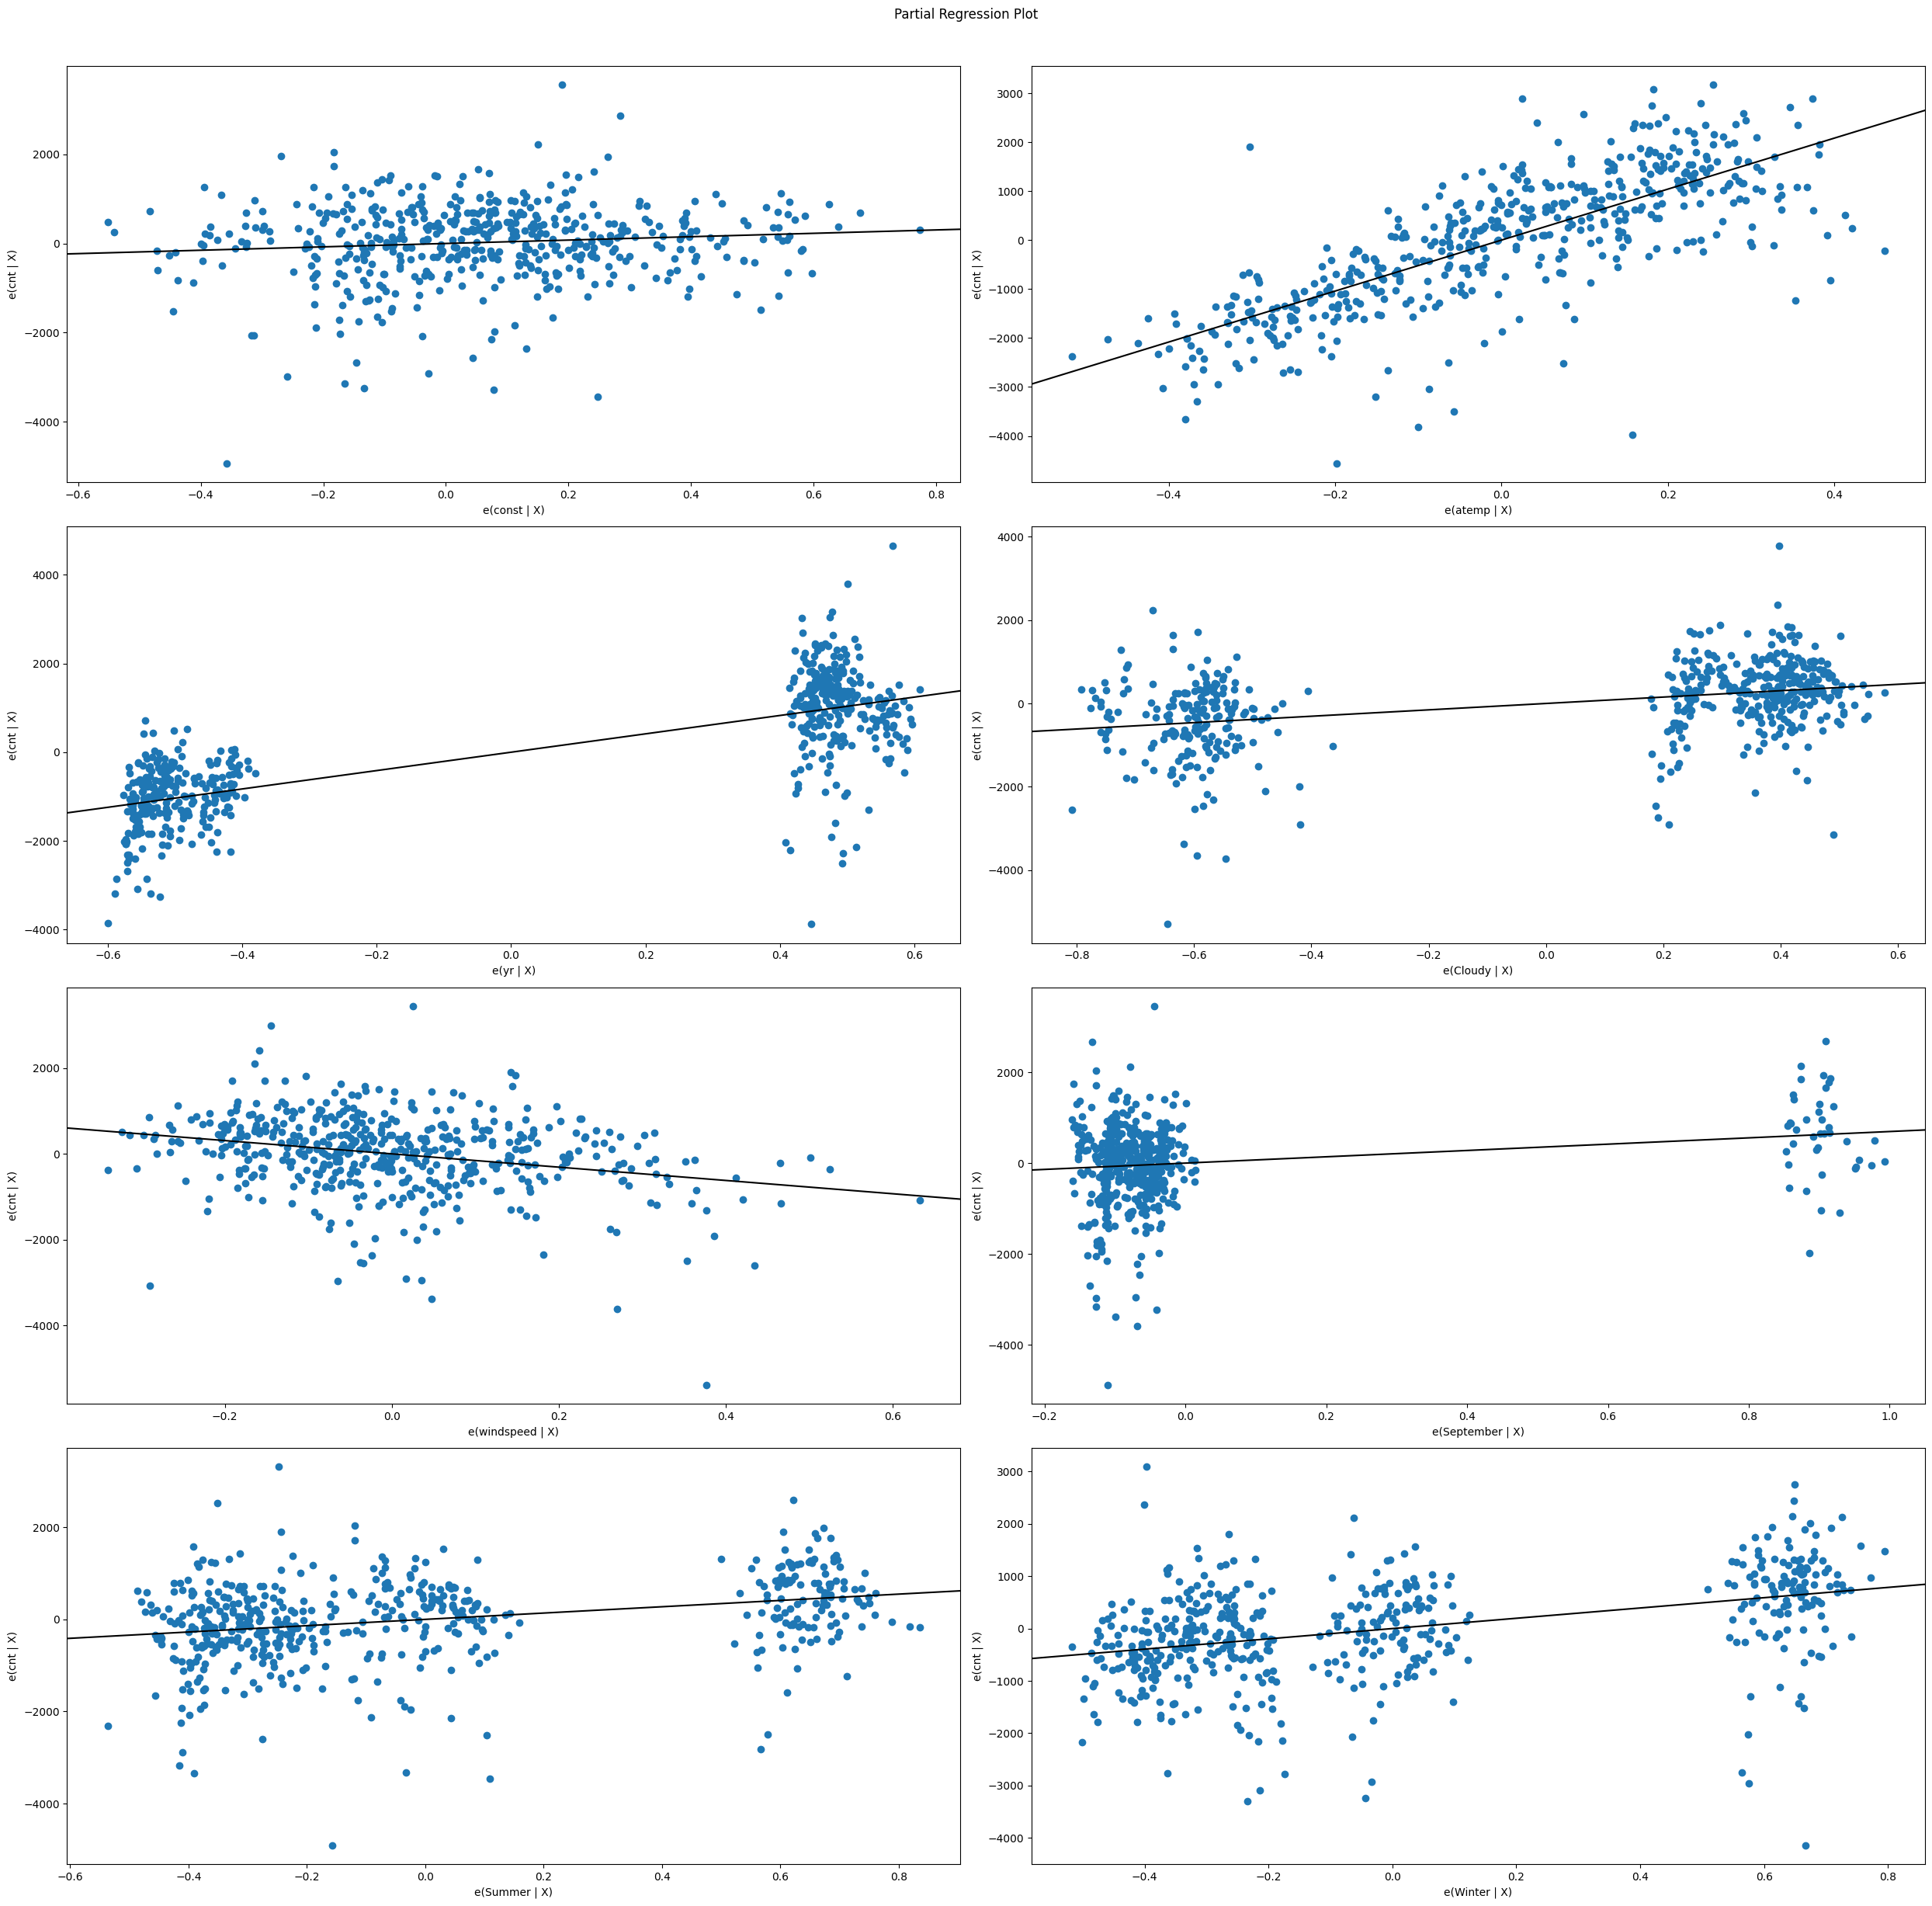

In [124]:

fig=pyplot.figure(figsize=(25,25))
statsmodels.graphics.regressionplots.plot_partregress_grid(model13,fig=fig)
pyplot.show()

#### Residual Analysis

##### Error Analysis in training set 

In [125]:
error = pd.DataFrame({"y_pred_train_model13":[],"y_train":[]})
error['y_train'] = y_train['cnt']
error['y_pred_train_model13'] = y_pred_train_model13
error['error_model13']= y_pred_train_model13-y_train['cnt']
error

,y_pred_train_model13,y_train,error_model13
653,6296.177293,7534,-1237.822707
576,6747.040832,7216,-468.959168
426,4290.598776,4066,224.598776
728,3209.506140,1796,1413.506140
482,4829.717790,4220,609.717790
...,...,...,...
403,3373.380457,2802,571.380457
53,2055.282051,1917,138.282051
350,1820.332741,2739,-918.667259
79,2472.626214,2077,395.626214


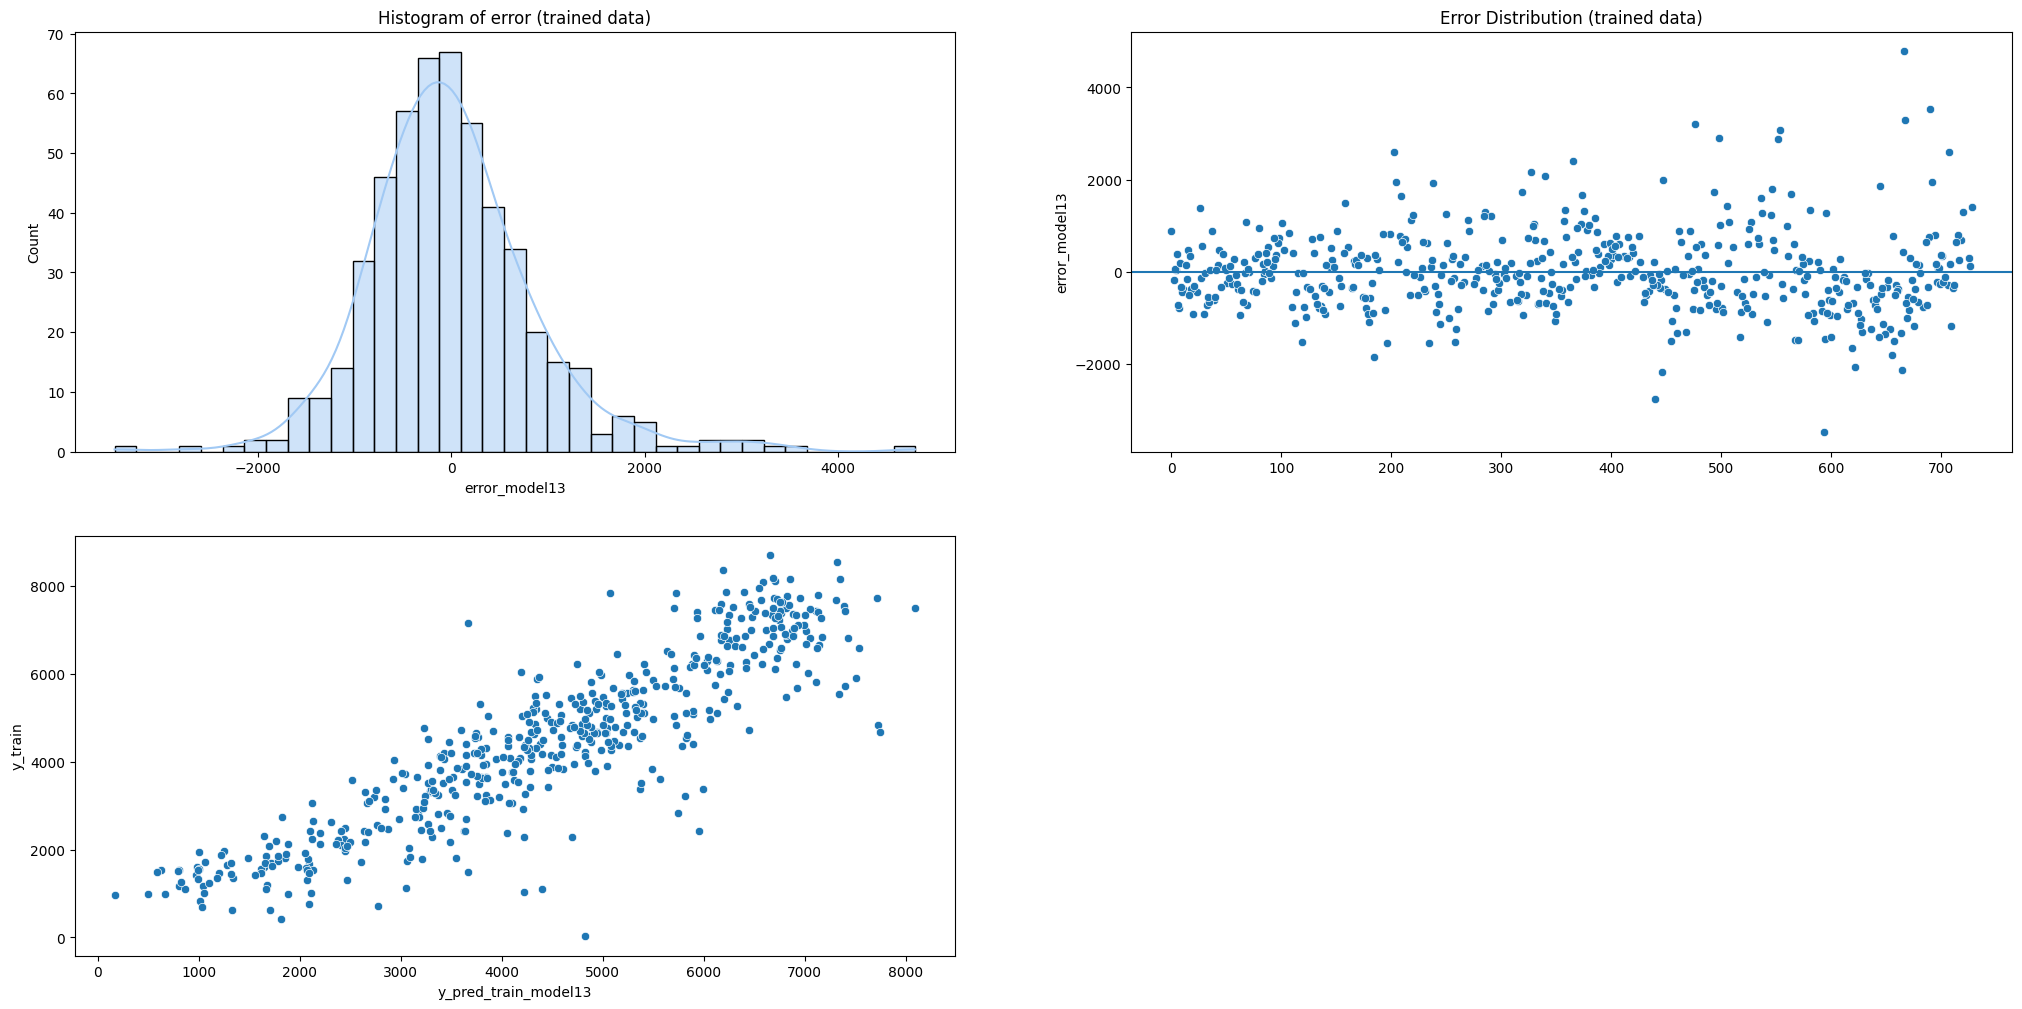

In [126]:
pyplot.figure(figsize=(25,12))
pyplot.subplot(2,2,1)
ax=sns.histplot(error["error_model13"],kde=True,color=default_palette[0])
ax.set_title("Histogram of error (trained data)")
pyplot.subplot(2,2,2)
ax1=sns.scatterplot(error['error_model13'])
ax1.set_title("Error Distribution (trained data)")
ax1.axhline(y=0)
pyplot.subplot(2,2,3)
sns.scatterplot(error,x='y_pred_train_model13',y='y_train')
pyplot.show()

##### Error Analysis in testing set 

In [127]:
error = pd.DataFrame({"y_pred_test_model13":[],"y_test":[]})
error['y_test'] = y_test['cnt']
error['y_pred_test_model13'] = y_pred_test_model13
error['error_model13']= y_pred_test_model13-y_test['cnt']
error

,y_pred_test_model13,y_test,error_model13
96,3807.034272,3141,666.034272
535,7994.241433,6211,1783.241433
299,3383.990339,2659,724.990339
280,5021.298211,5409,-387.701789
36,2216.836249,1623,593.836249
...,...,...,...
486,6666.191809,6169,497.191809
466,5152.769427,5409,-256.230573
216,4572.346715,4866,-293.653285
433,3923.548926,4118,-194.451074


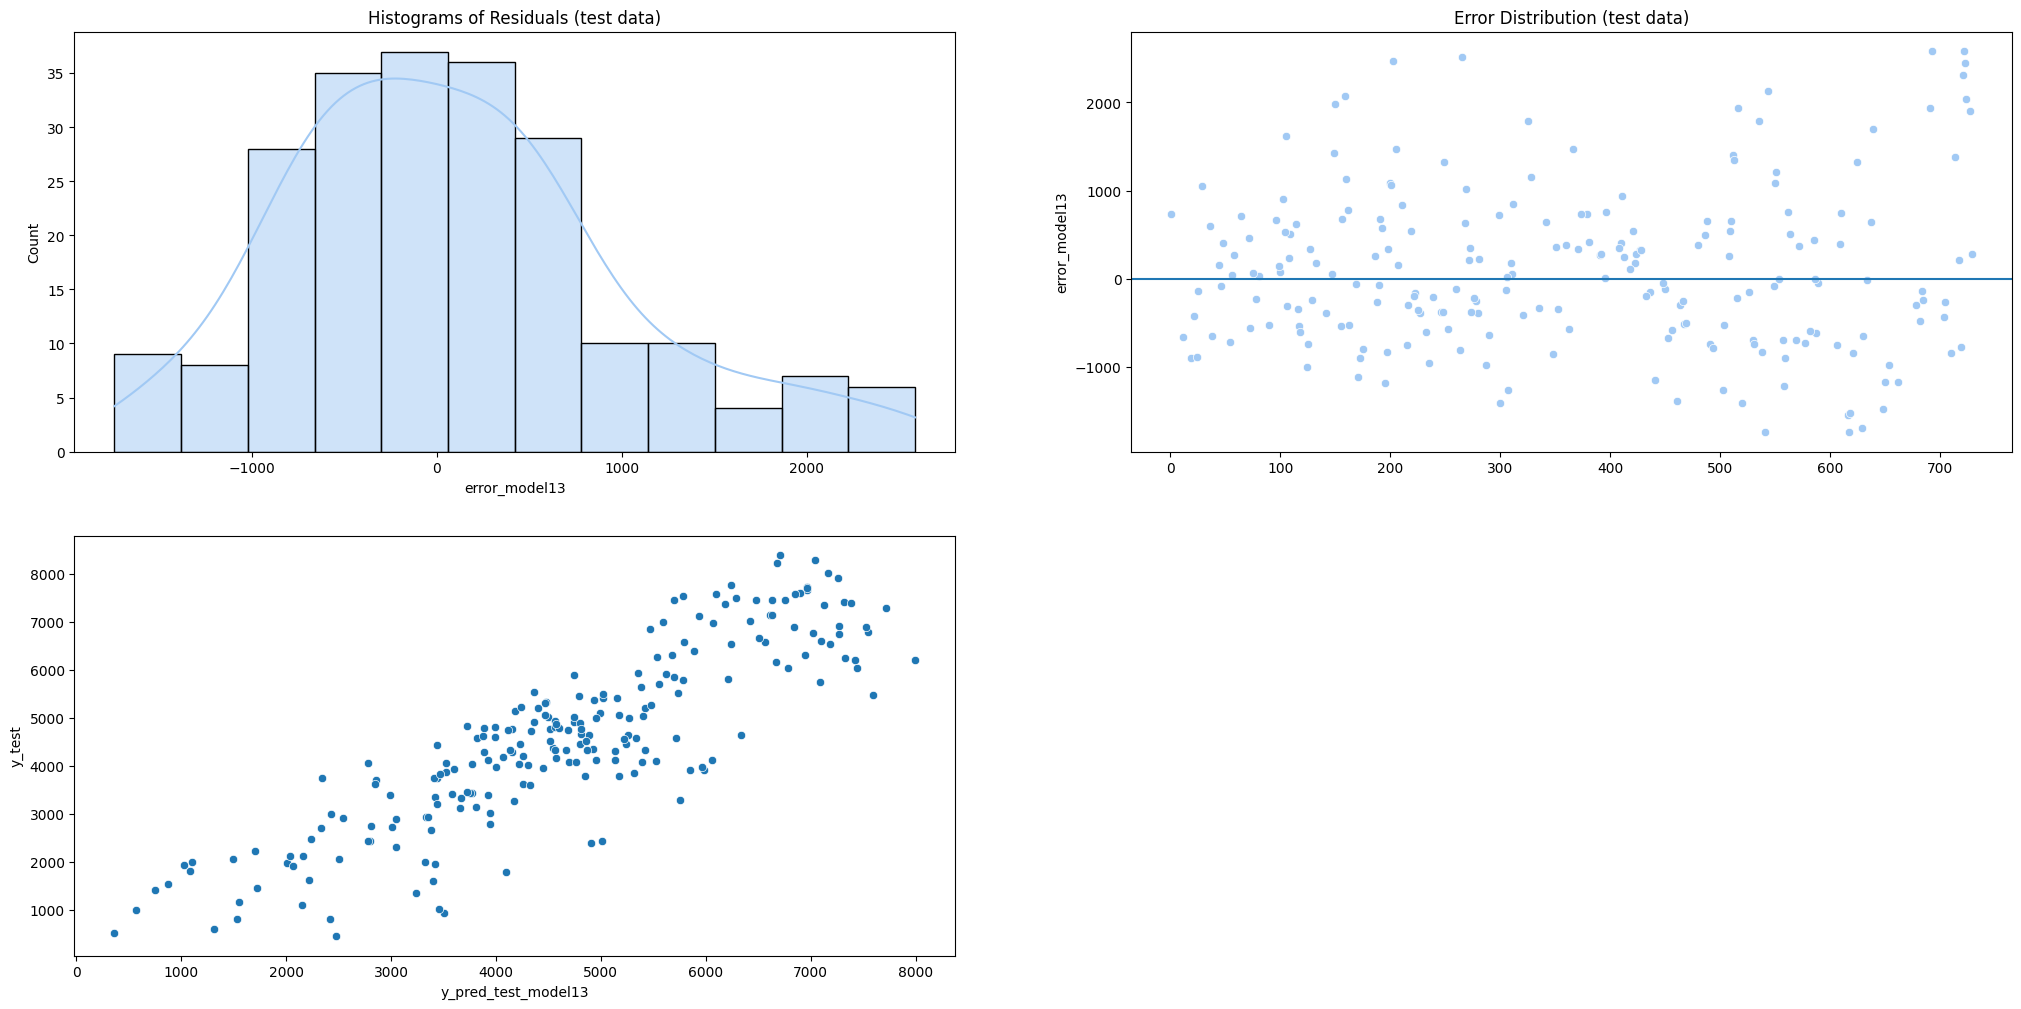

In [128]:
pyplot.figure(figsize=(25,12))
pyplot.subplot(2,2,1)
ax1=sns.histplot(error["error_model13"],kde=True,color=default_palette[0])
ax1.set_title("Histograms of Residuals (test data)")
pyplot.subplot(2,2,2)
ax2=sns.scatterplot(error['error_model13'],color=default_palette[0])
ax2.axhline(y=0)
ax2.set_title("Error Distribution (test data)")
pyplot.subplot(2,2,3)
sns.scatterplot(error,x='y_pred_test_model13',y='y_test')
pyplot.show()

#### Inference 
<font color='brown'>
1. The errors are displaying a normal distribution with with mean 0<br/>
2. Scatter plot of error residues does not show any trend
</font>

#### Predicted Trend vs Identified Trend

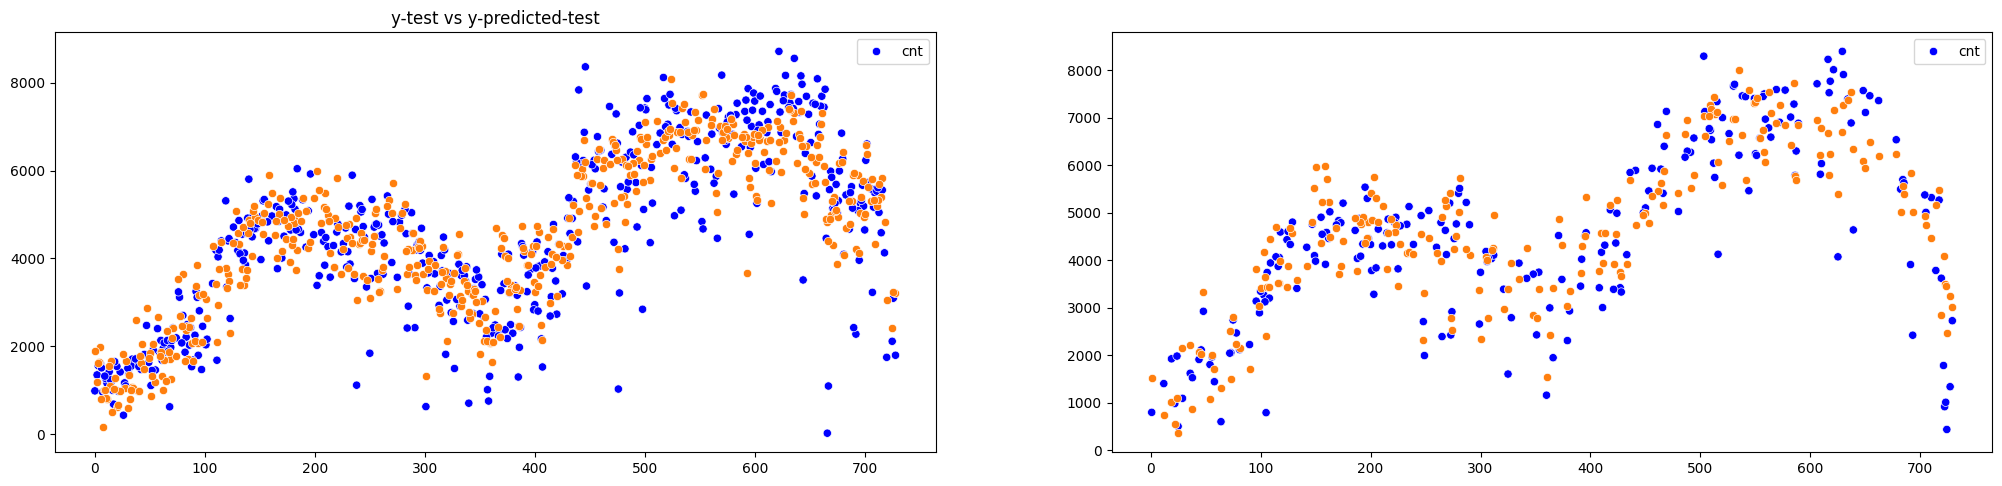

In [129]:
pyplot.figure(figsize=(25,12))
fig=pyplot.subplot(2,2,1)
sns.scatterplot(y_train,palette='blend:blue,yellow')
sns.scatterplot(y_pred_train_model13,palette='blend:red,yellow')
fig.set_title("y-train vs y-predicted-train")
pyplot.subplot(2,2,2)
sns.scatterplot(y_test,palette='blend:blue,yellow')
sns.scatterplot(y_pred_test_model13,palette='blend:red,yellow')
fig.set_title("y-test vs y-predicted-test")
pyplot.show()

#### R-square evaluation of Training Set

In [130]:
round(r2_score(y_train,y_pred_train_model13),2)

0.8

#### R-square evaluation of Test Set

In [131]:
round(r2_score(y_test,y_pred_test_model13),2)

0.76

#### Q-Q Plots of Residuals

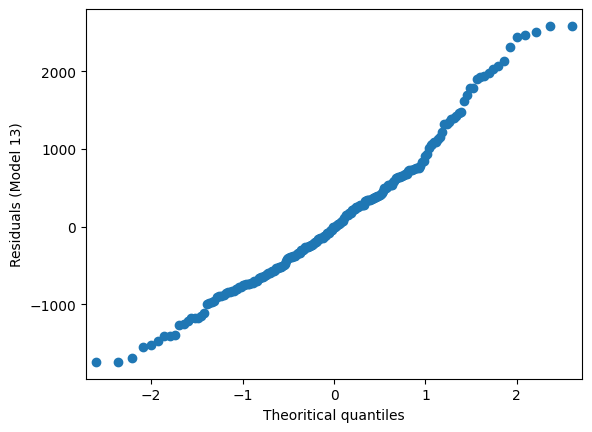

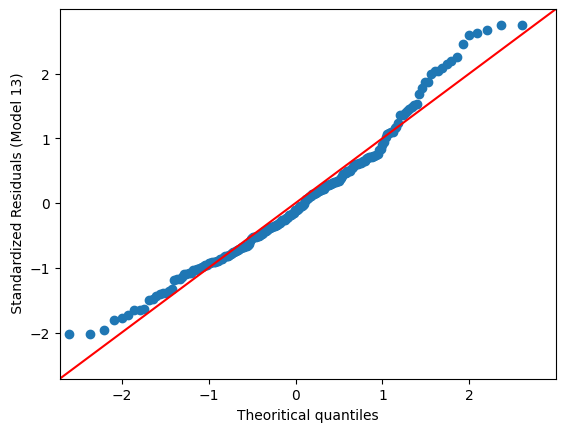

In [132]:
sm.qqplot(error['error_model13'],dist=stats.norm)
pyplot.xlabel("Theoritical quantiles")
pyplot.ylabel("Residuals (Model 13)")
pyplot.show()
sm.qqplot(error['error_model13'],line='45',fit=True,dist=stats.norm)
pyplot.xlabel("Theoritical quantiles")
pyplot.ylabel(" Standardized Residuals (Model 13)")
pyplot.show()

#### Inference 
<font color='brown'>
1. The scatter plot between y_train and y_train_predicted by the model does not show any major deviation <br/>
2. The scatter plot between y_test and y_test_predicted by the model does not show any major deviation <br/>
3. The Q-Q plot and histogram of residuals shows the residuals follows normal distribution
</font>

#### Rebuilding the model with sklearn

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
lr=LinearRegression()

In [135]:
lr.fit(X_train[['atemp','yr','Cloudy','windspeed','September','Summer','Winter']],y_train)

LinearRegression()

In [136]:
y_pred_lr=lr.predict(X_train[['atemp','yr','Cloudy','windspeed','September','Summer','Winter']])

In [137]:
r2_score(y_train,y_pred_lr)

0.8011751685734361

In [138]:
coeff=pd.DataFrame({'features':[],'coeff':[]})
coeff['features']=['atemp','yr','Cloudy','windspeed','September','Summer','Winter']
coeff['coeff']=lr.coef_[0]

In [139]:
coeff

,features,coeff
0,atemp,5203.933625
1,yr,2069.894189
2,Cloudy,766.681581
3,windspeed,-1549.715603
4,September,694.724274
5,Summer,685.576511
6,Winter,982.973024


In [140]:
from functools import reduce
coeff['eq']=coeff.apply(lambda x: " X ".join([x['features'],str(round(x['coeff'],2))]),axis=1) 
equation=reduce(lambda x,y:' + '.join([x,y]),coeff['eq']) 

#### Conclusion

##### The Model can be explained as a linear equation below 


In [141]:
equation

'atemp X 5203.93 + yr X 2069.89 + Cloudy X 766.68 + windspeed X -1549.72 + September X 694.72 + Summer X 685.58 + Winter X 982.97'

##### The driver variables effectively increasing the demand in the upcoming year are
<font color='brown'><b>
    1. Feeling Temperature
    2. Season (Summer,Winter)
    3. Cloudy Weather
    4. Windspeed
</b></font>

##### Summary

1. Boom bikes can plan for the Demand Increase  during the summer season with Clear , Cloudy Sky when usually the feeling temperatures are high and windspeed is less<br/>
2. Boom bikes can also plan for demand surge during Winter (due to festivities) ,  